In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import argparse
import cv2
import imutils
import tensorflow as tf
from tensorflow import keras
from imutils.contours import sort_contours

In [2]:
from google.colab.patches import cv2_imshow

In [3]:
model=keras.models.load_model("/content/drive/MyDrive/checkpoint-model3/bestmodel1-1.hdf5")

In [4]:
#nếu sử dụng bestmodel1-1 va bestmodel2-5 
class_mapping = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890'

In [ ]:
#nếu sử dụng bestmodel1-2 và bestmodel2-9
class_mapping = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890@#$%&(){}[],?'

In [5]:
labelNames = [l for l in class_mapping]

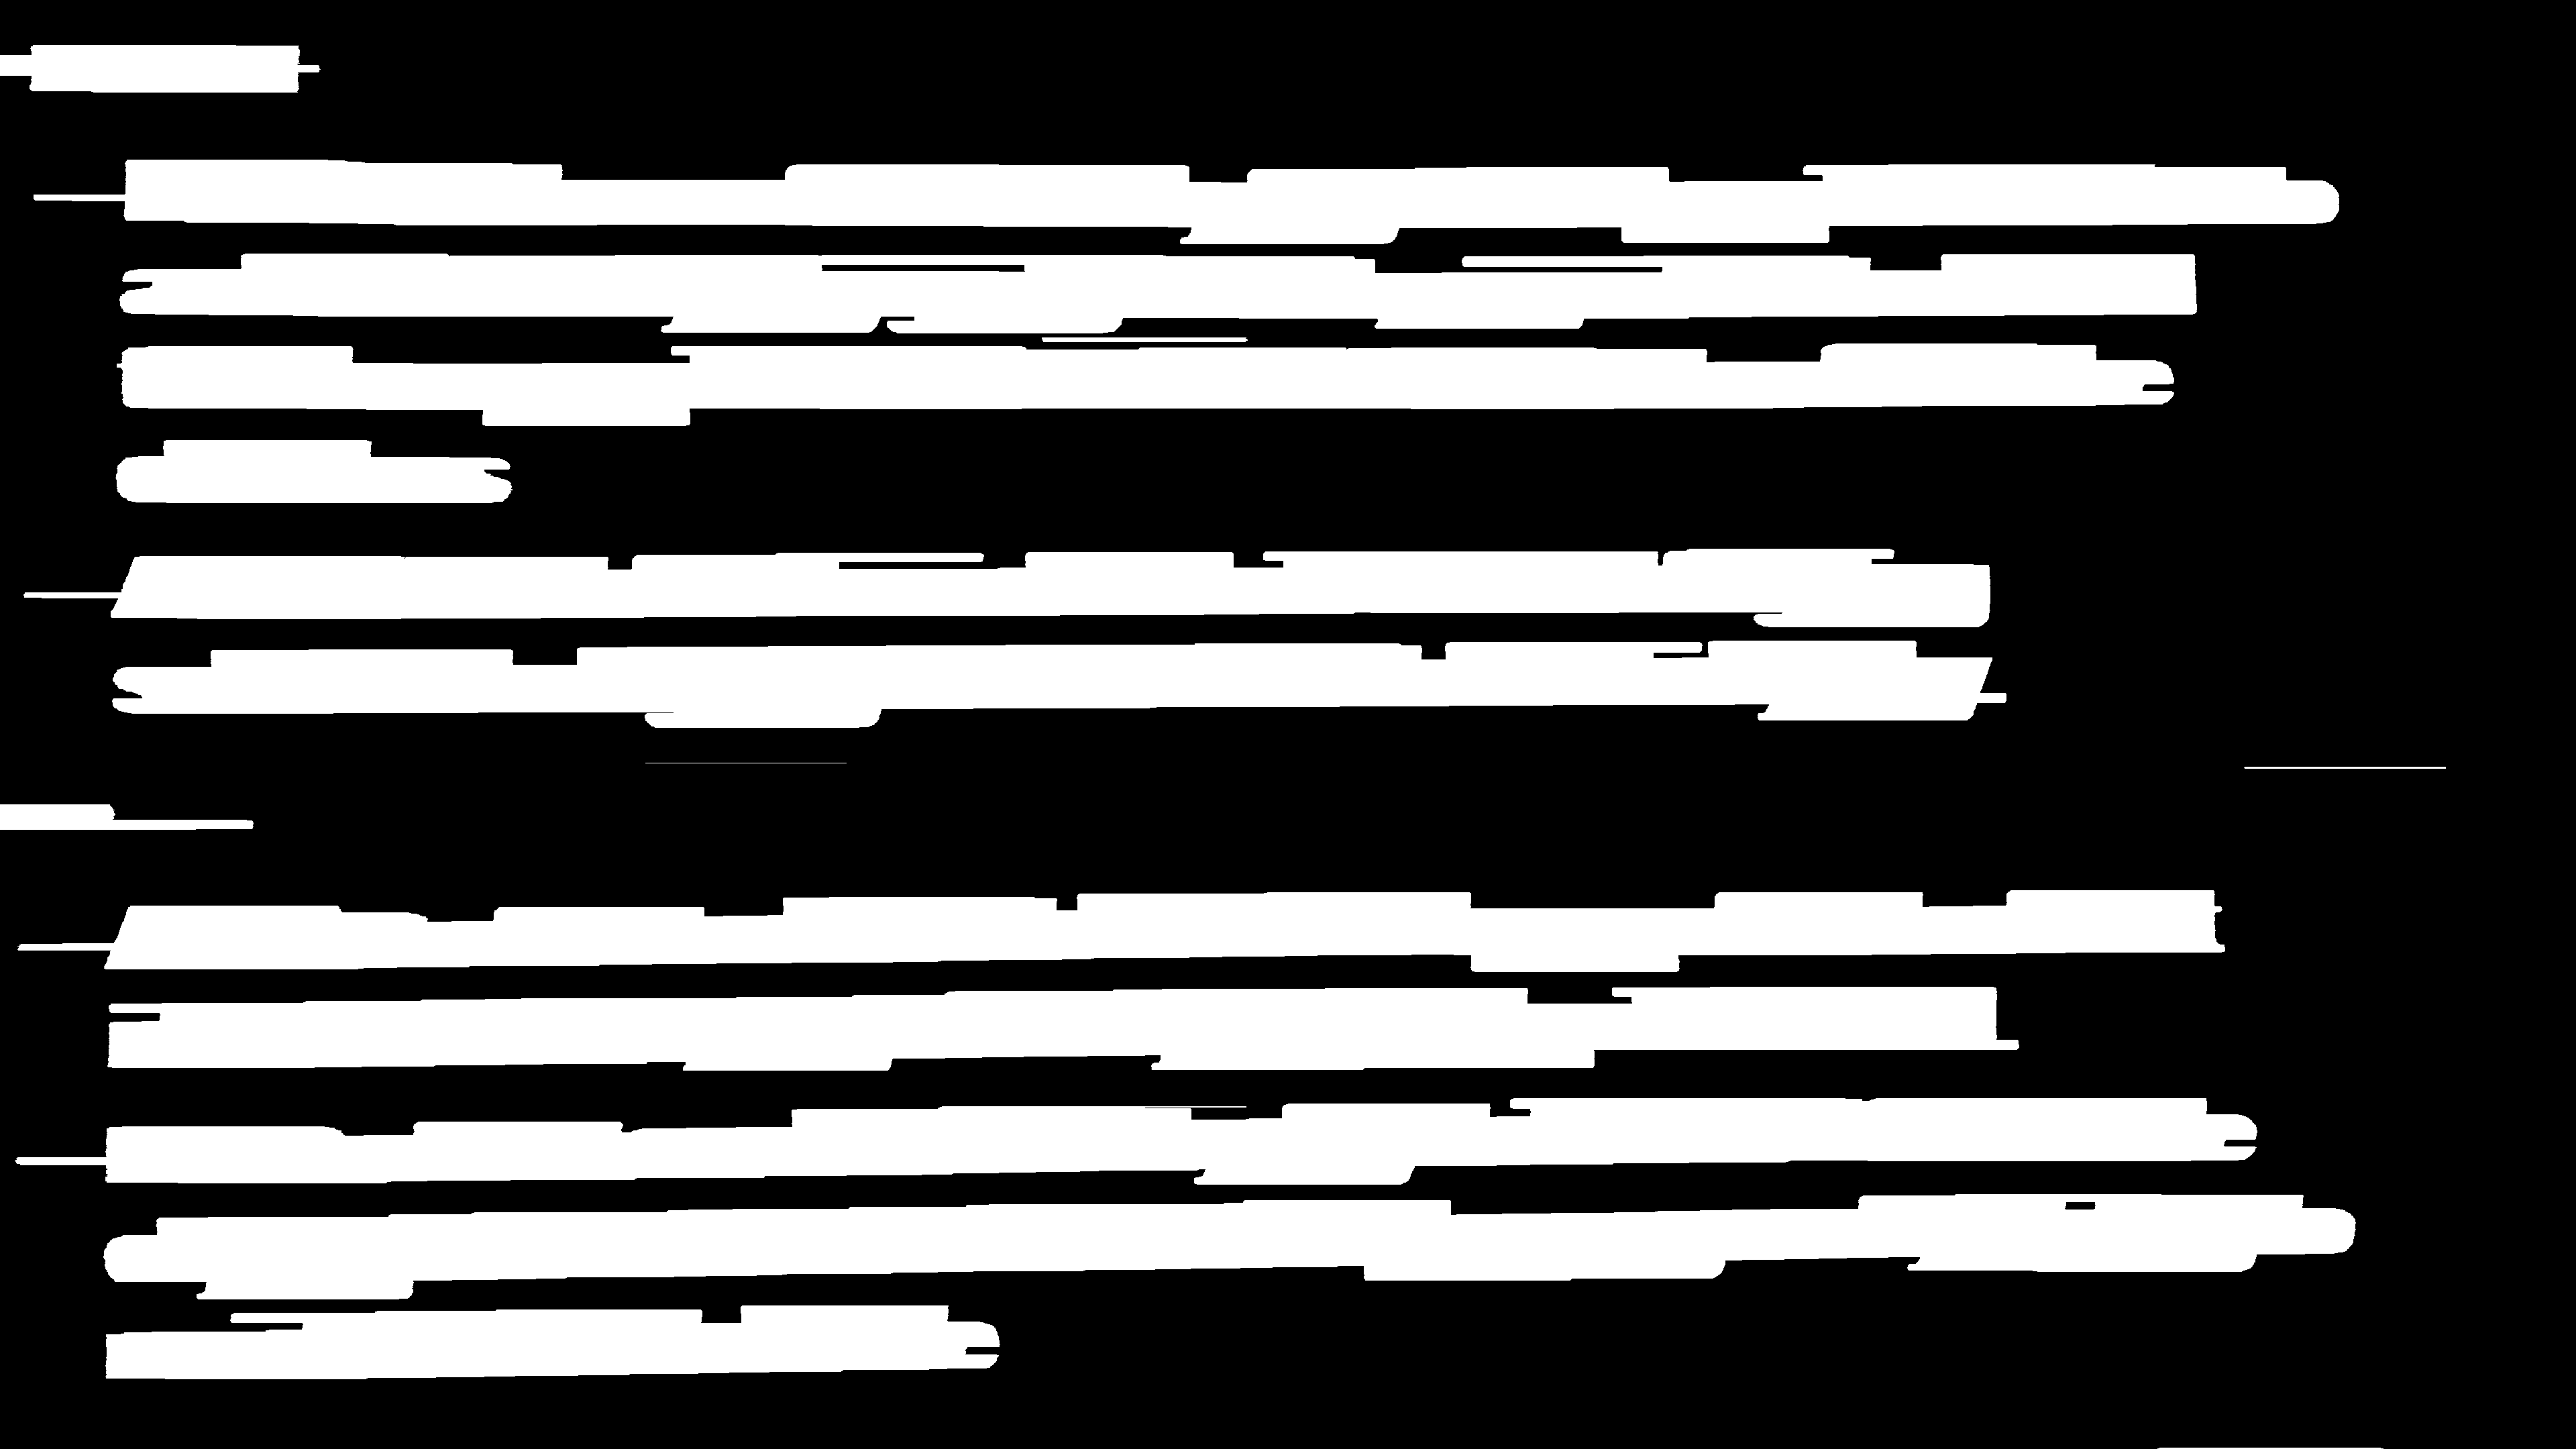

112.38461538461539


In [8]:
#pre -proccessing image
count=0
avg_line_height=0
sum_line_height=0
image = cv2.imread('/content/drive/MyDrive/images/phone_text4.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# gray=cv2.resize(gray,(gray.shape[1]*8,gray.shape[0]*8), interpolation = cv2.INTER_LINEAR)
# cv2.imshow('gray',gray)
# cv2.waitKey(0)

image_h=gray.shape[0]
image_w=gray.shape[1]
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,15)
# cv2.imshow('second',thresh)
# cv2.waitKey(0)

kernel = np.ones((1,300), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2_imshow(img_dilation)
# cv2.waitKey(0)

ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
width=0
height=0
# sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
sorted_ctrs = sort_contours(ctrs,"top-to-bottom")[0]
lines=[]
result=[]
results=np.array([[0,0,0,0]])
roi_number = 0
ROI_number = 0
roi2_number = 0
img1=255-thresh
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
  x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
  if h < np.round(image_h/100):
    continue
  sum_line_height+=h
  count+=1
avg_line_height=sum_line_height/count
print(avg_line_height)  

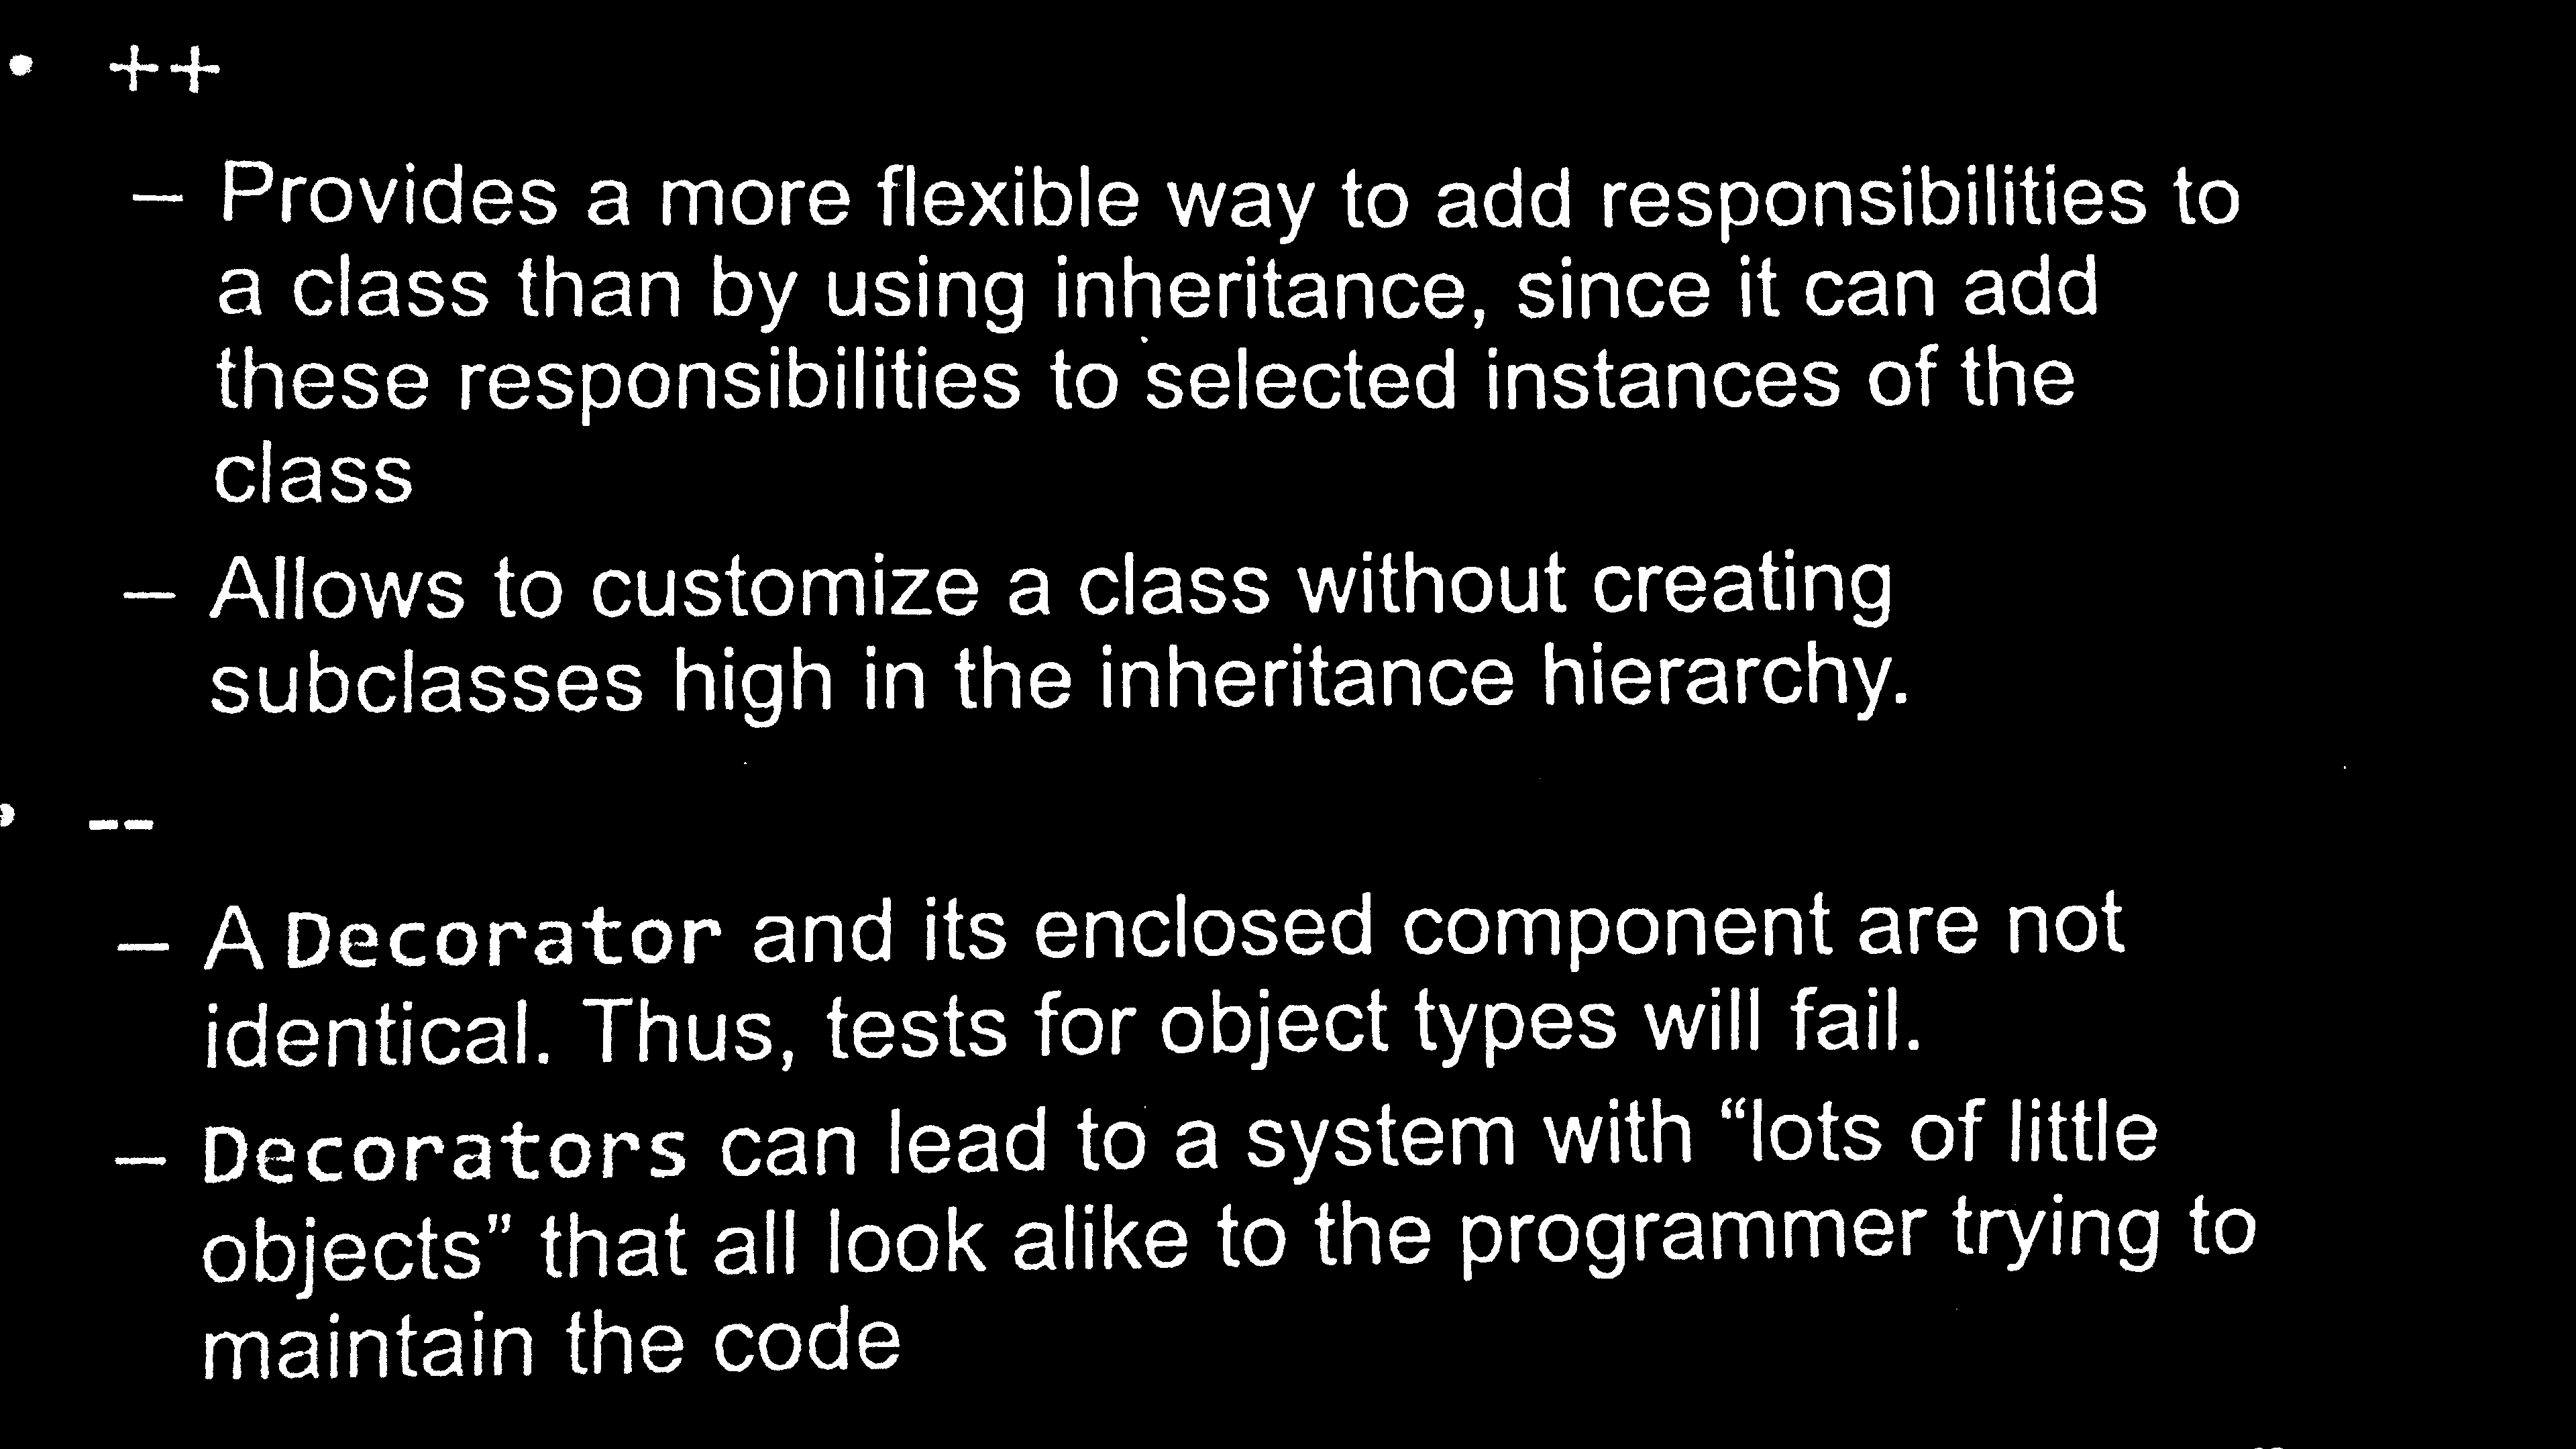

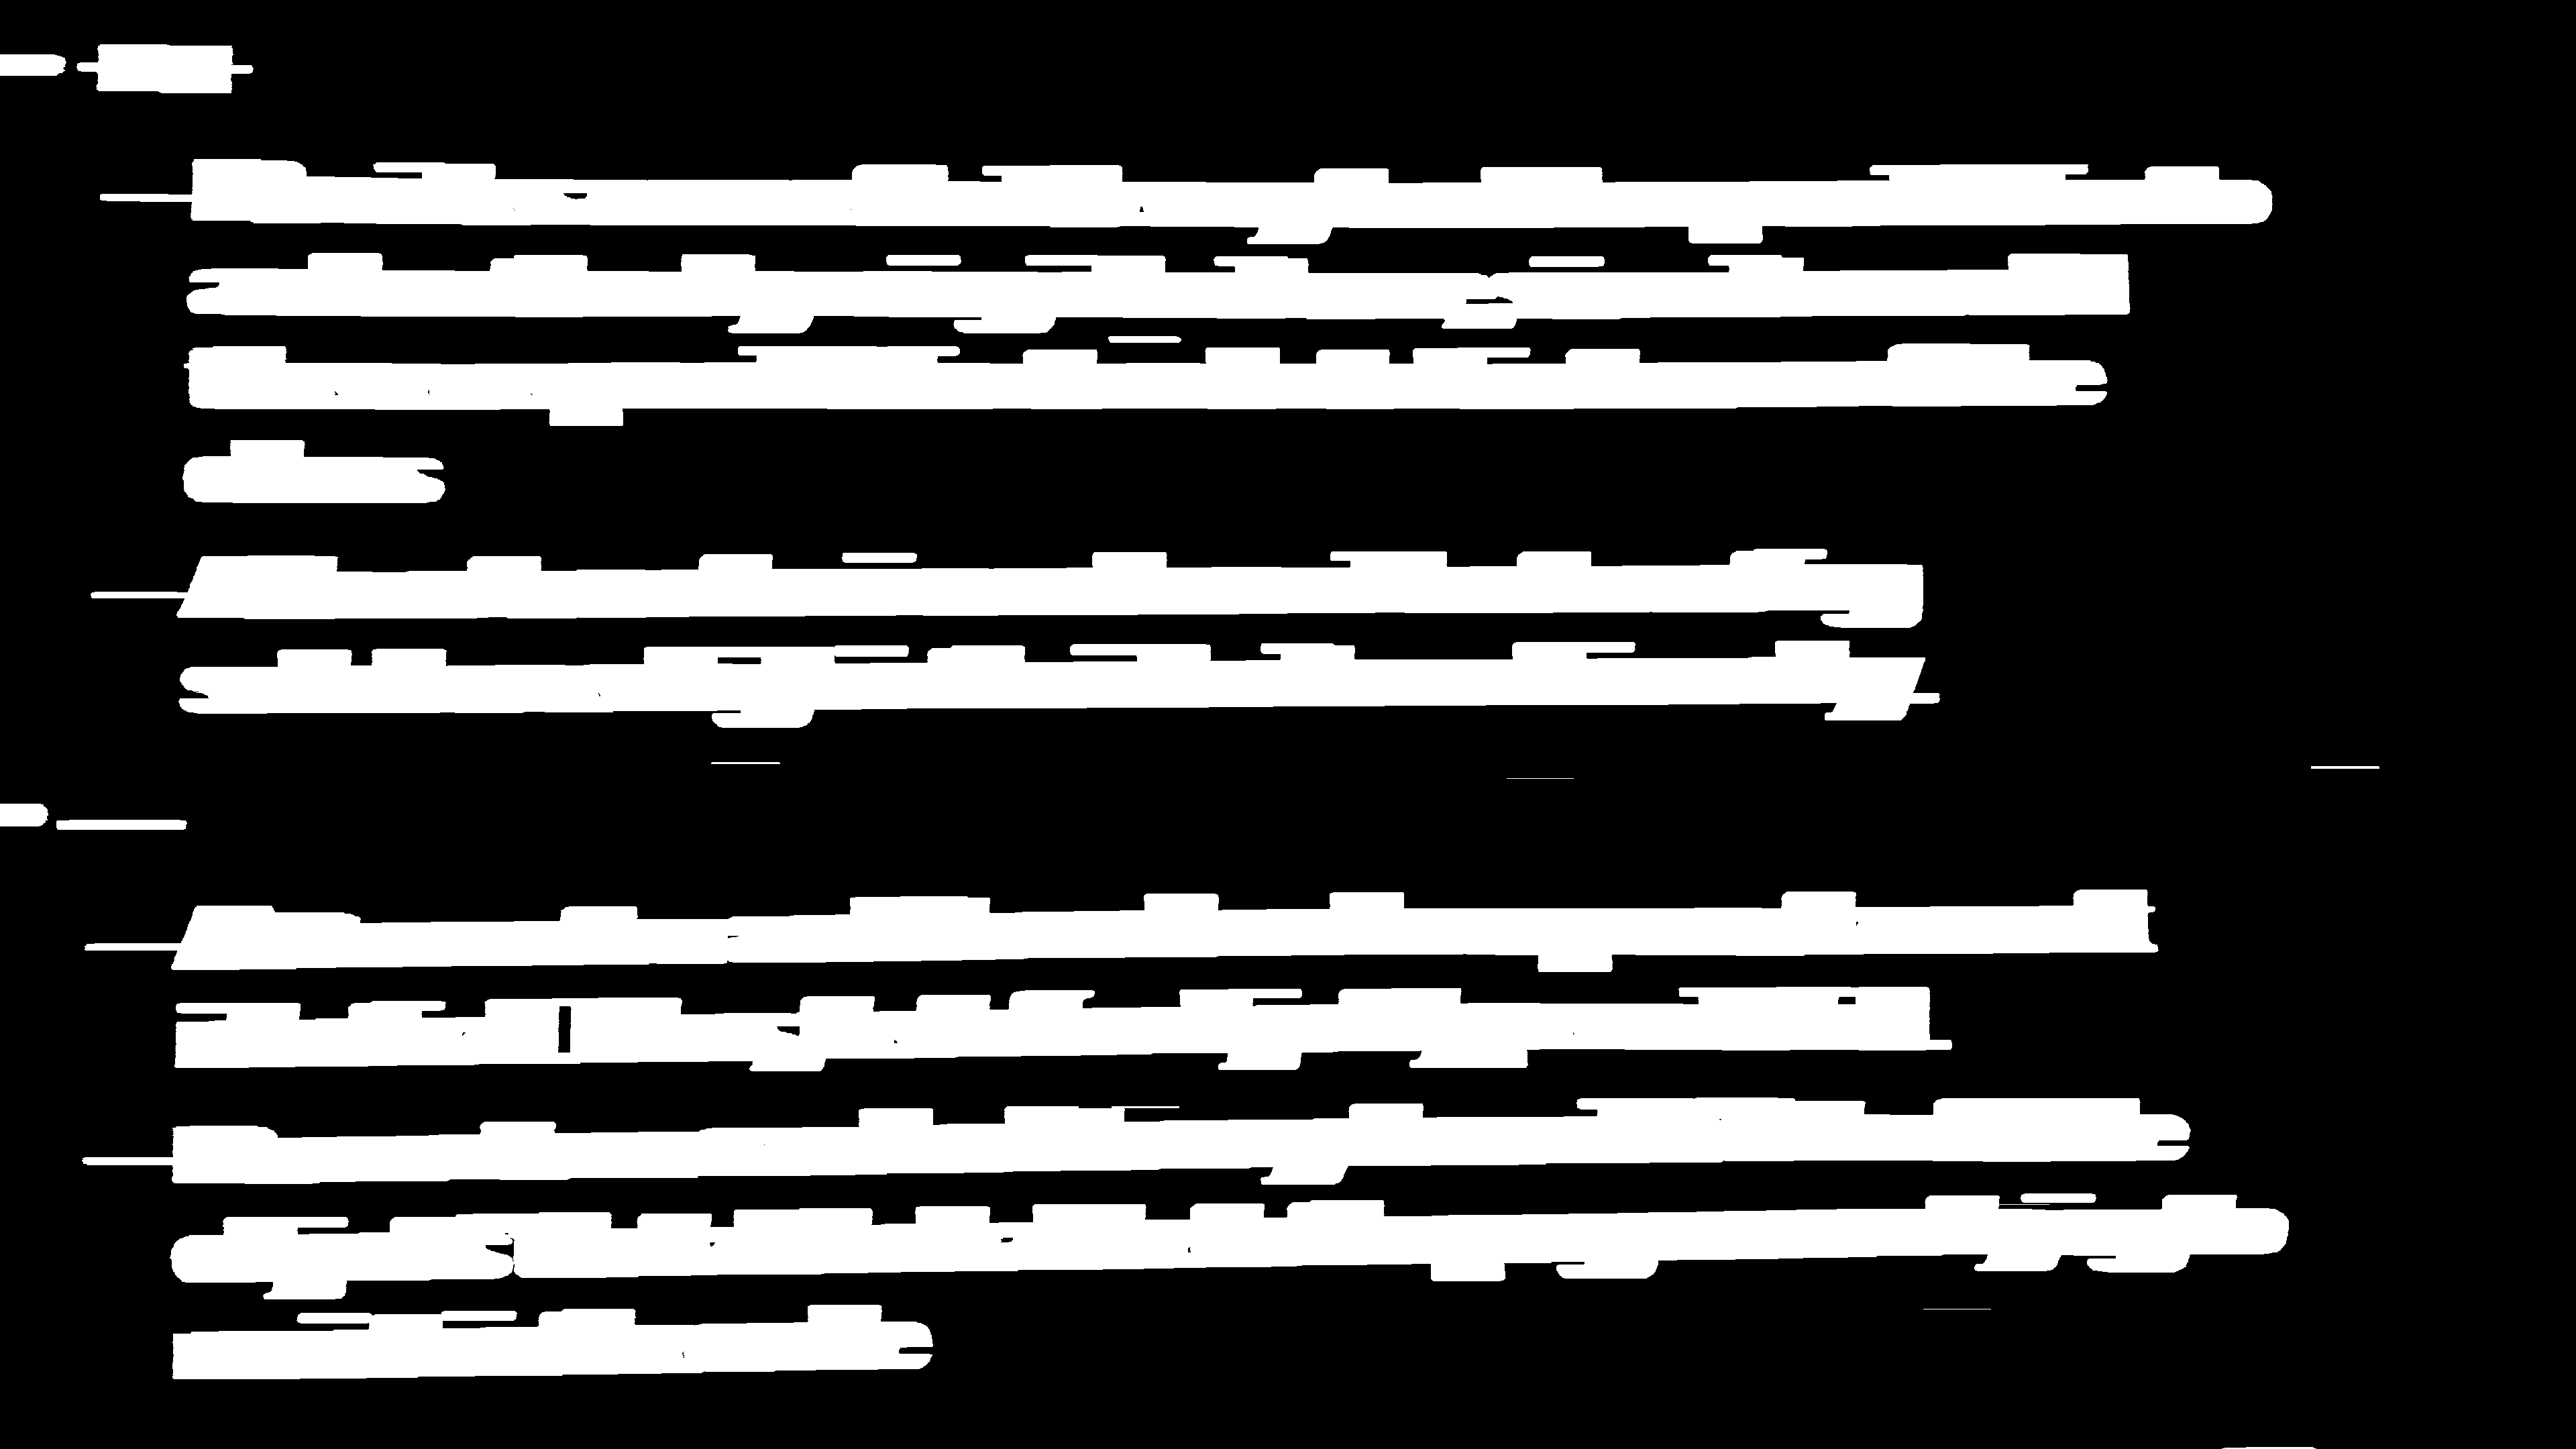

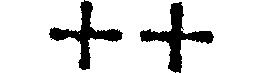

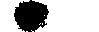

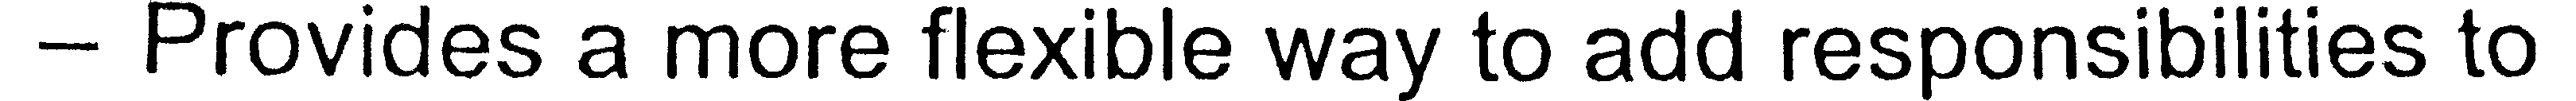

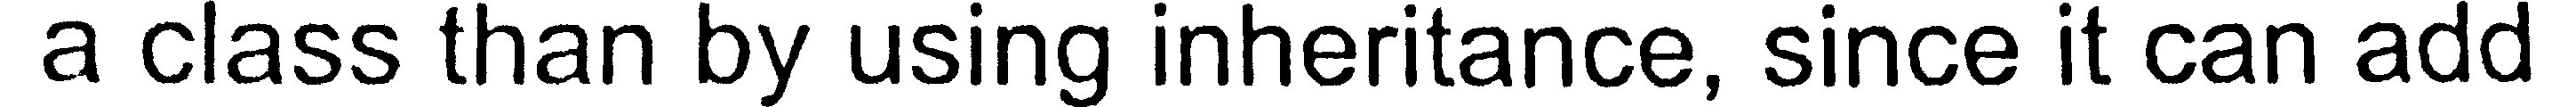

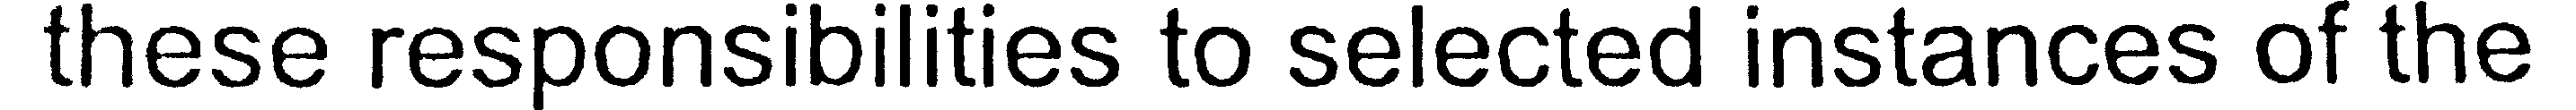

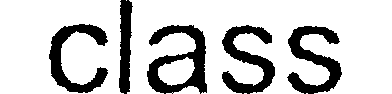

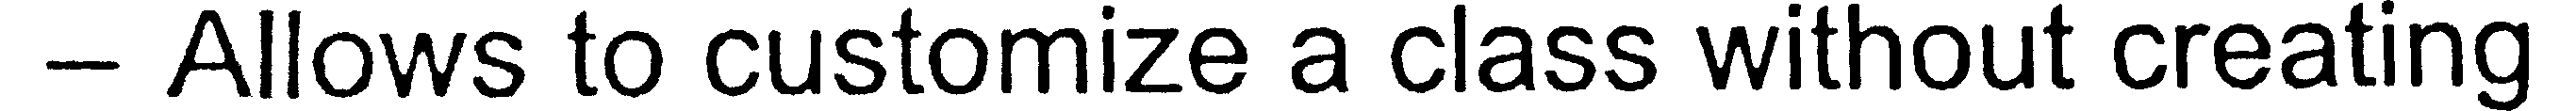

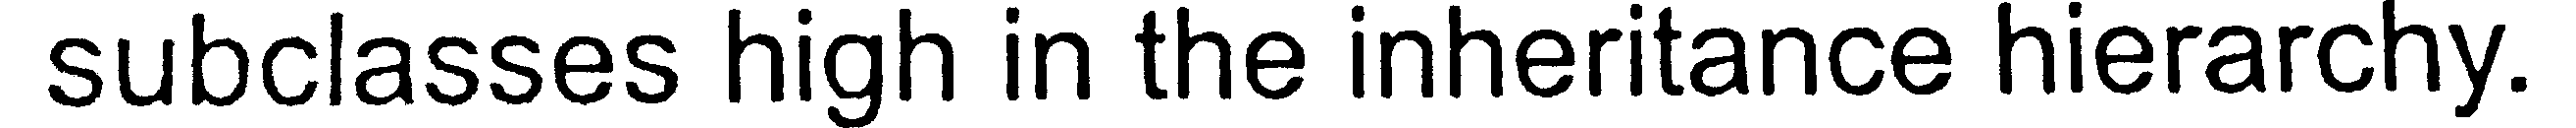

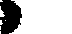

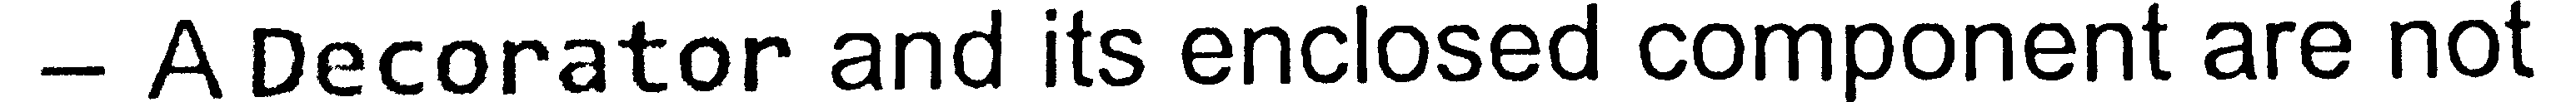

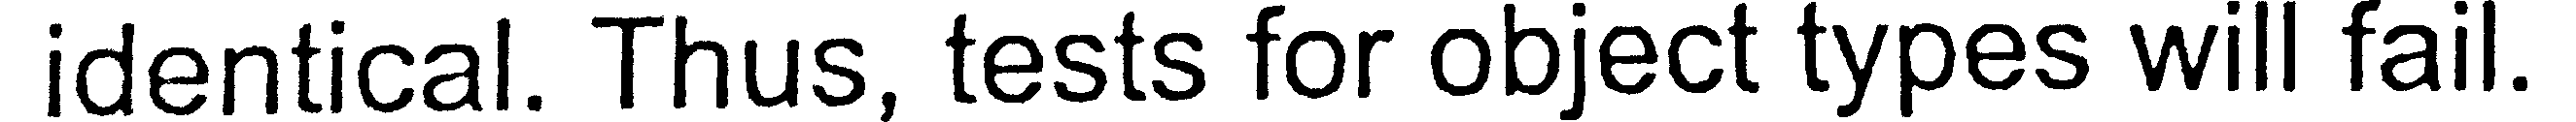

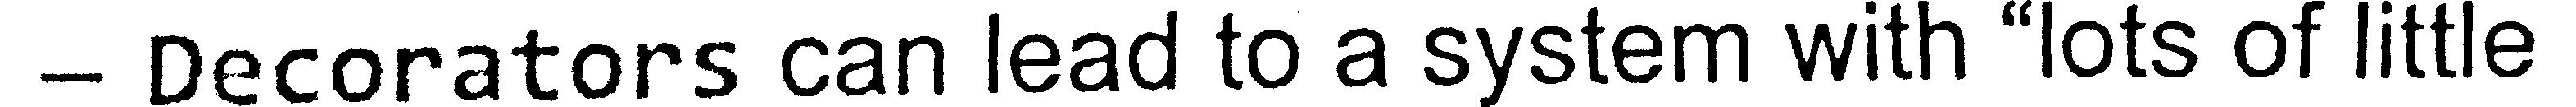

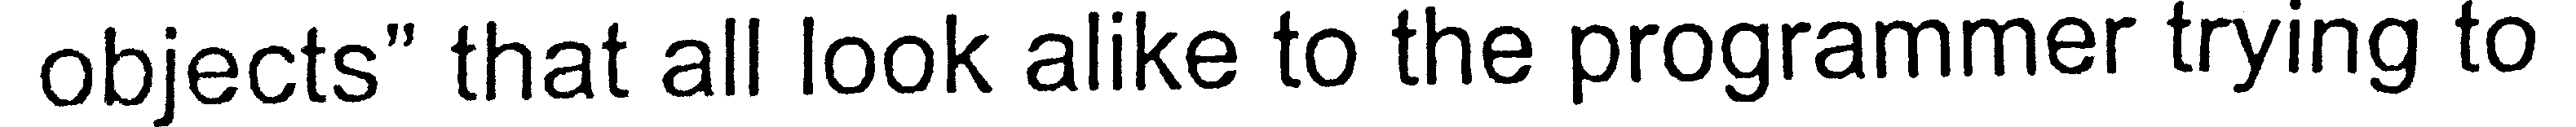

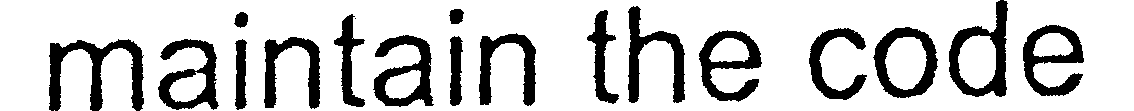

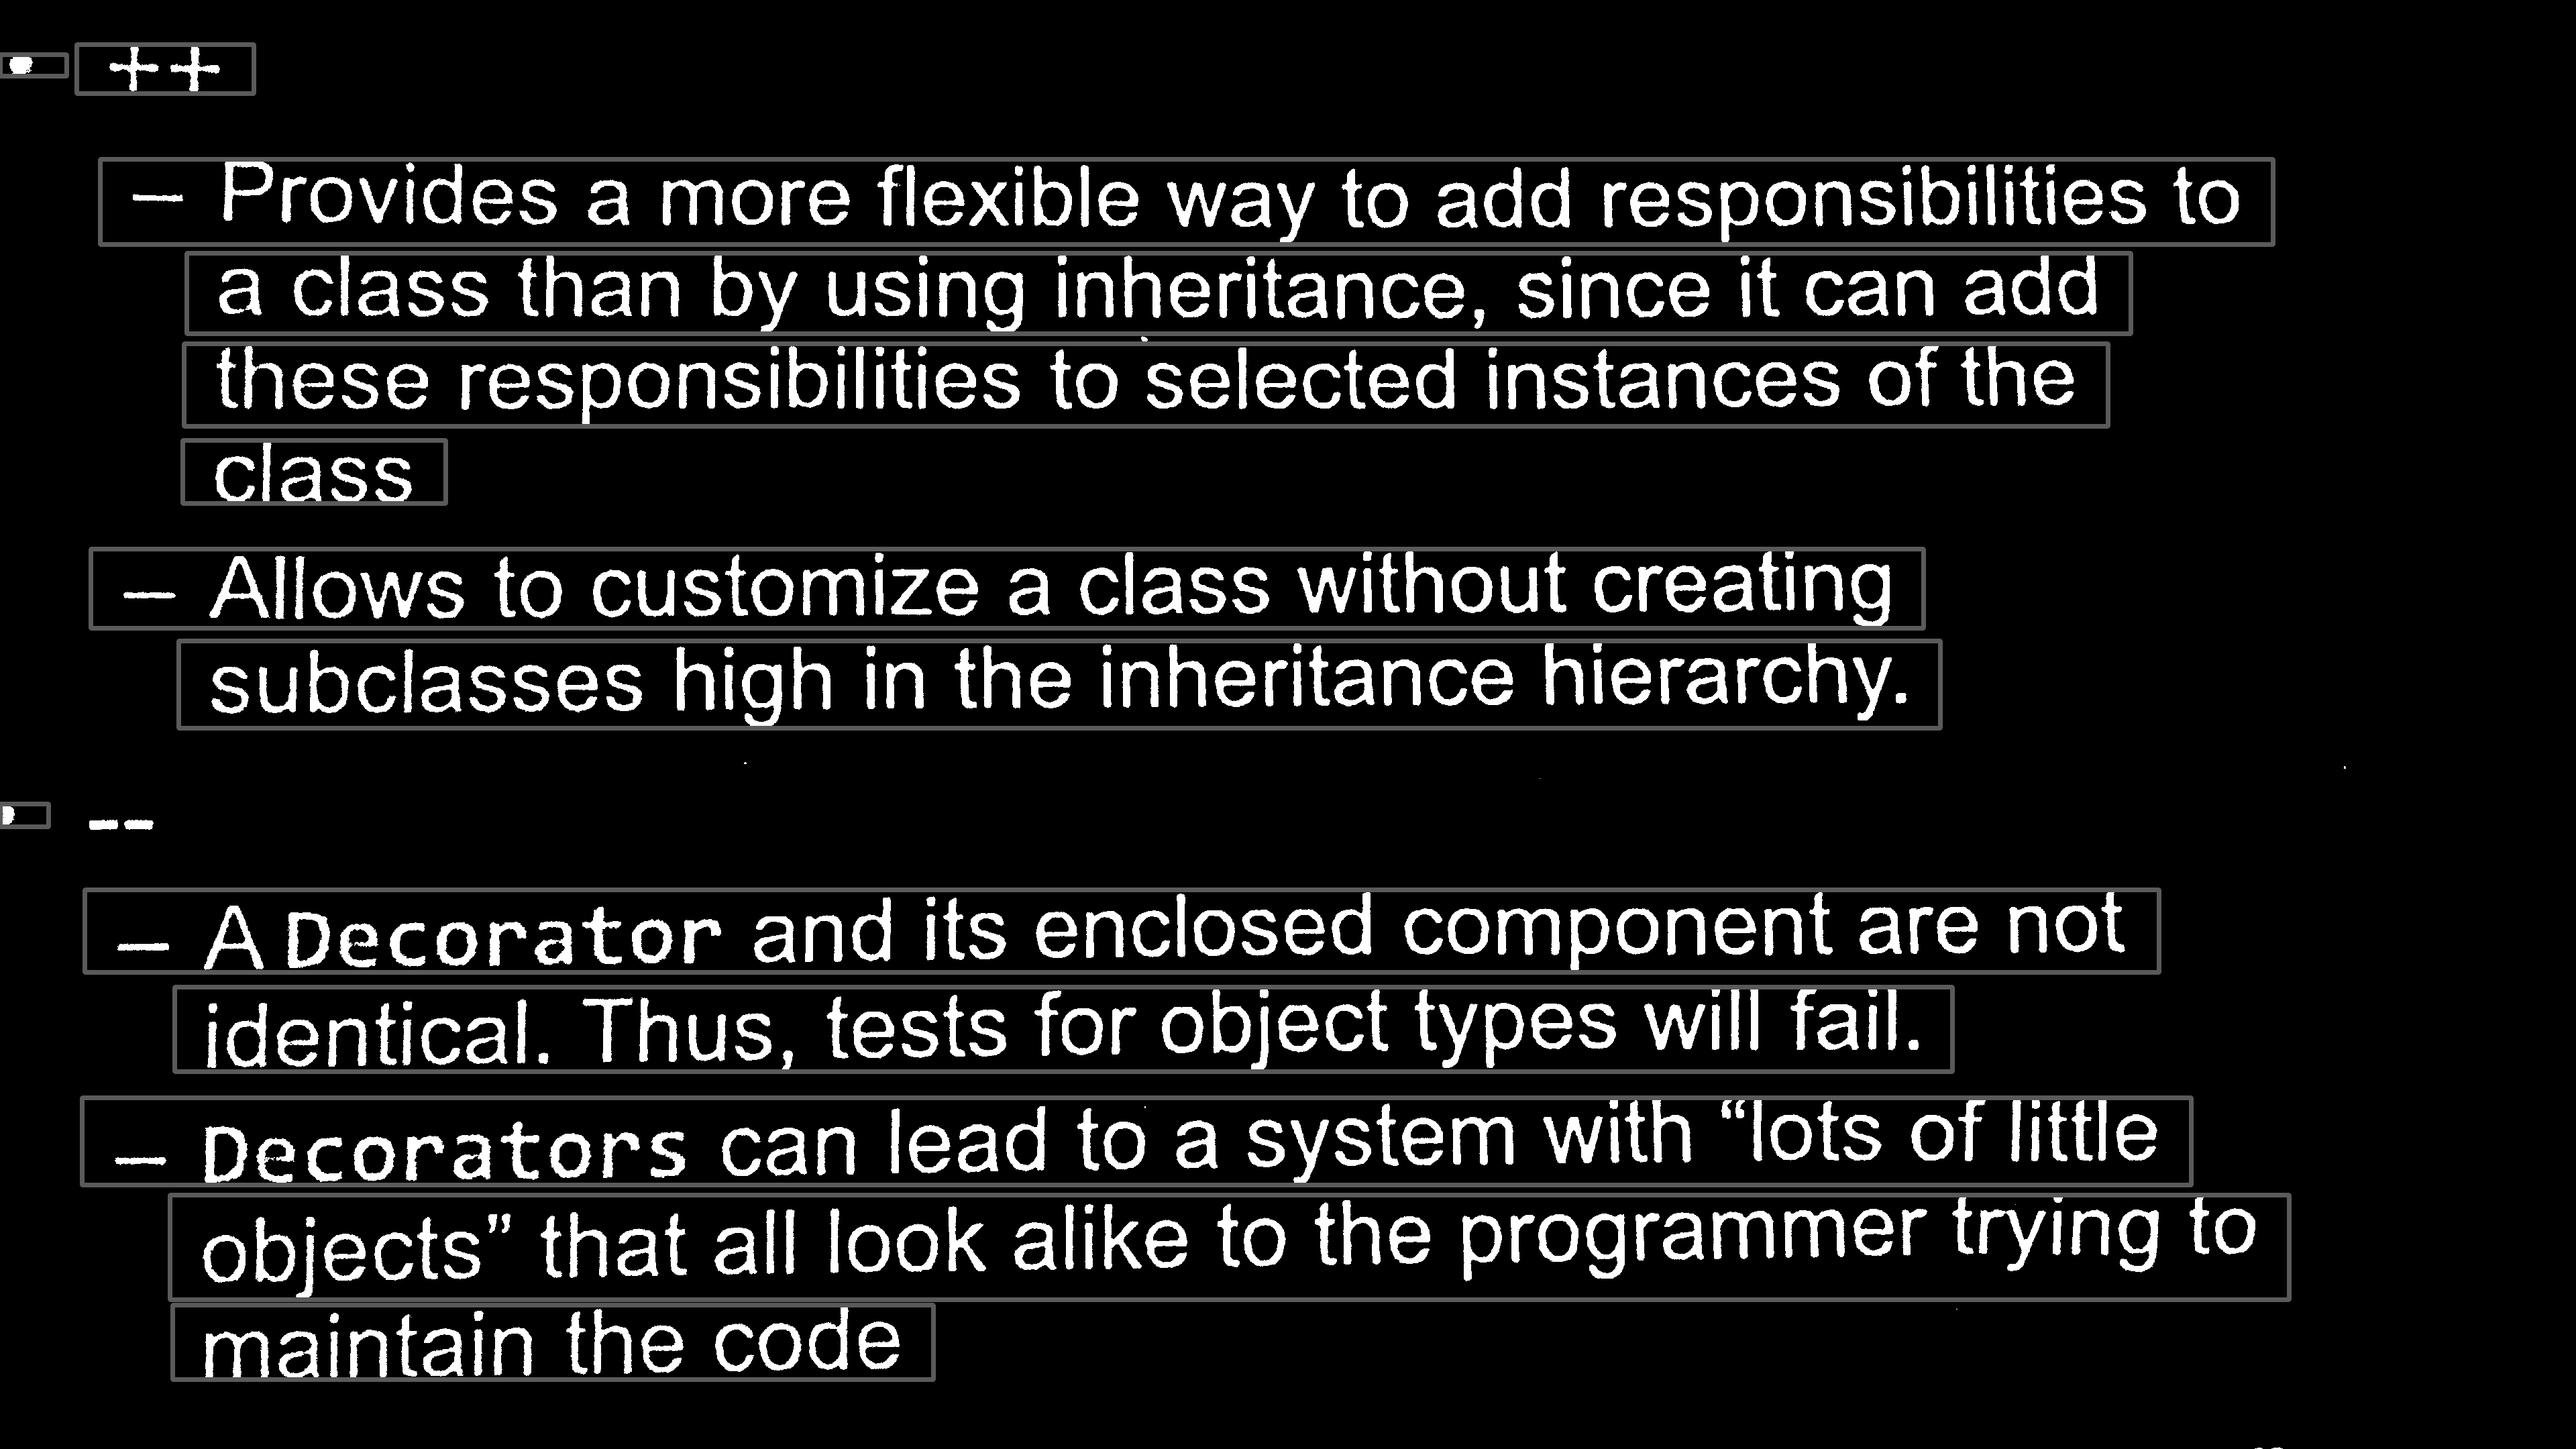

(73, 264)


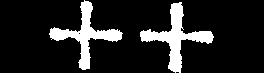

(73, 184)


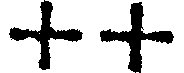

1


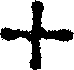

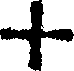

(32, 99)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


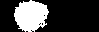

(32, 54)


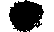

1


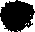

(127, 3239)


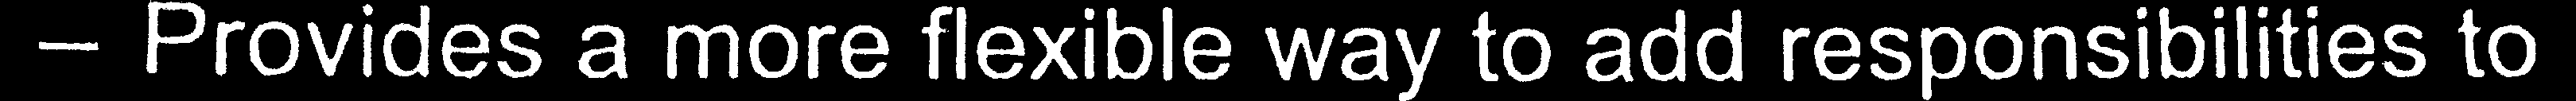

(99, 516)


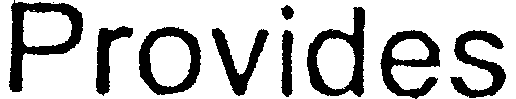

(68, 81)


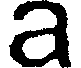

(68, 298)


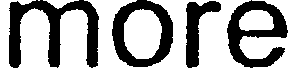

(94, 408)


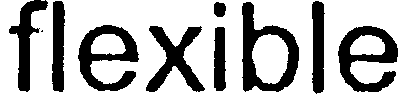

(93, 239)


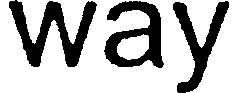

(89, 118)


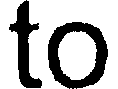

(91, 216)


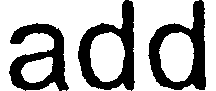

(118, 827)


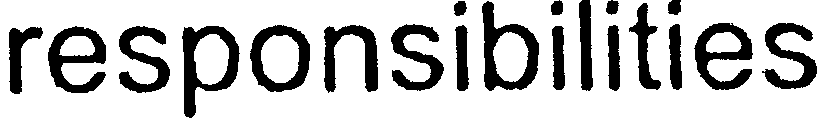

(86, 117)


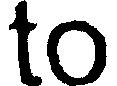

9


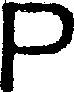

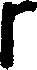

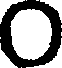

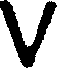

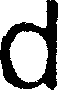

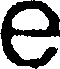

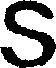

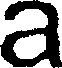

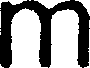

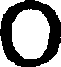

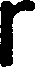

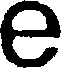

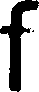

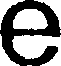

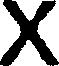

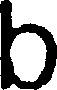

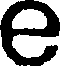

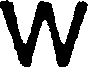

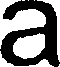

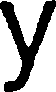

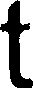

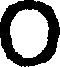

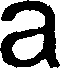

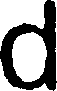

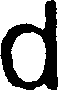

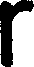

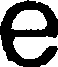

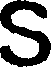

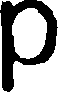

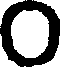

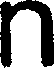

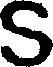

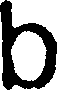

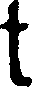

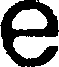

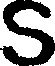

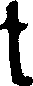

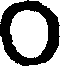

(120, 2898)


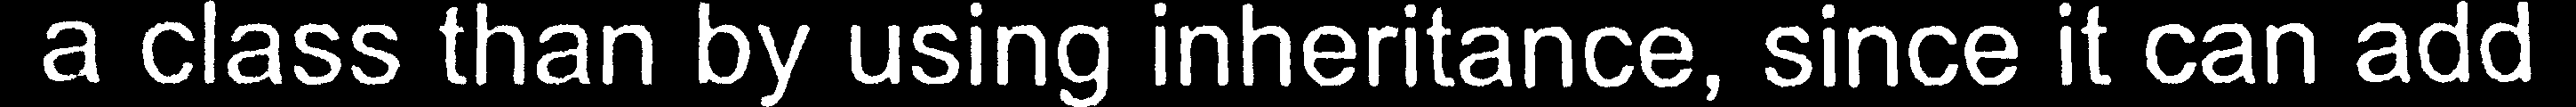

(70, 82)


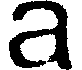

(95, 309)


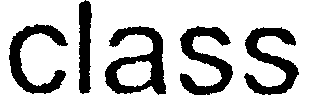

(93, 260)


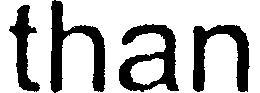

(118, 144)


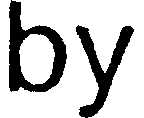

(93, 309)


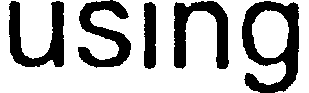

(95, 625)


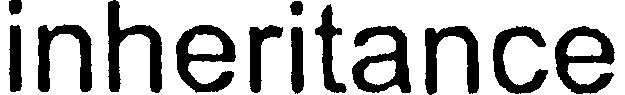

(70, 303)


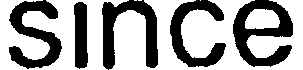

(89, 76)


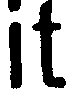

(68, 209)


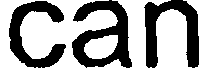

(92, 216)


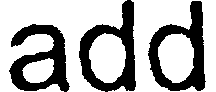

10


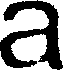

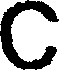

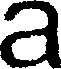

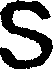

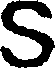

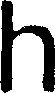

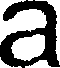

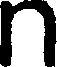

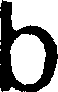

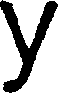

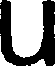

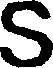

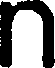

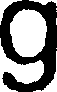

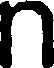

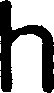

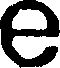

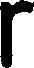

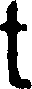

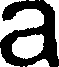

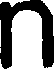

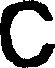

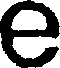

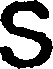

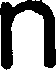

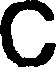

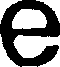

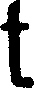

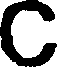

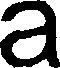

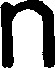

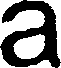

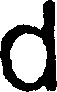

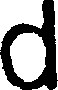

(123, 2868)


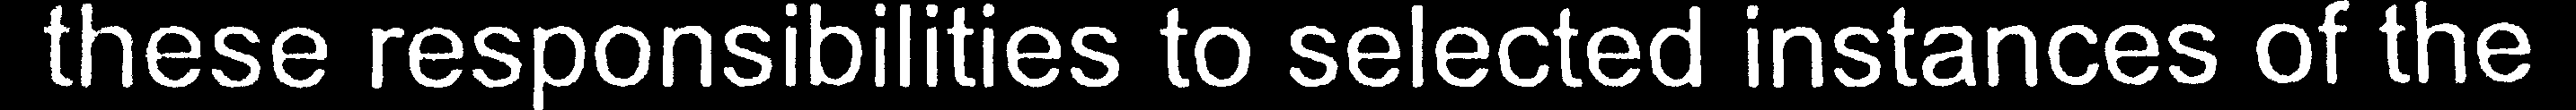

(95, 334)


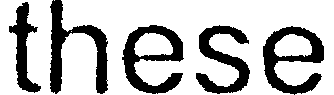

(119, 851)


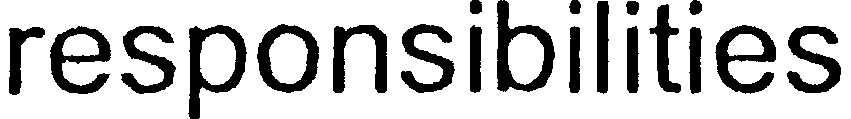

(89, 120)


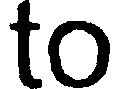

(92, 477)


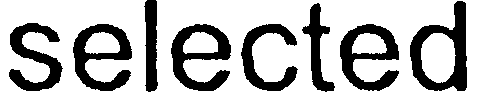

(90, 542)


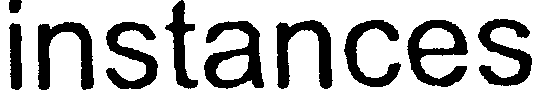

(94, 123)


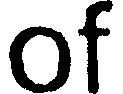

(92, 188)


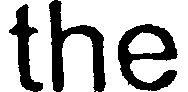

7


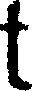

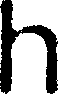

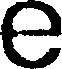

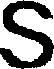

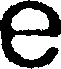

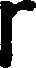

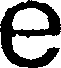

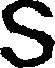

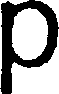

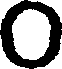

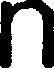

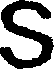

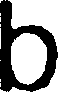

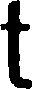

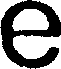

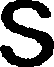

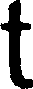

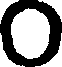

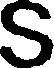

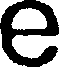

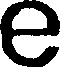

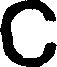

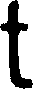

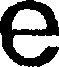

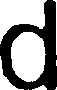

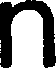

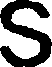

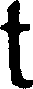

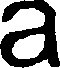

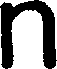

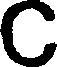

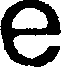

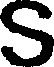

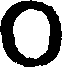

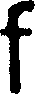

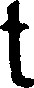

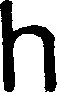

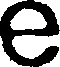

(94, 392)


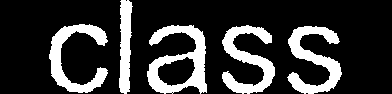

(94, 312)


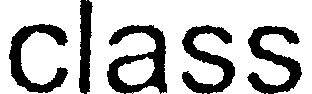

1


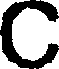

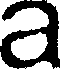

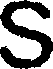

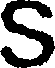

(118, 2732)


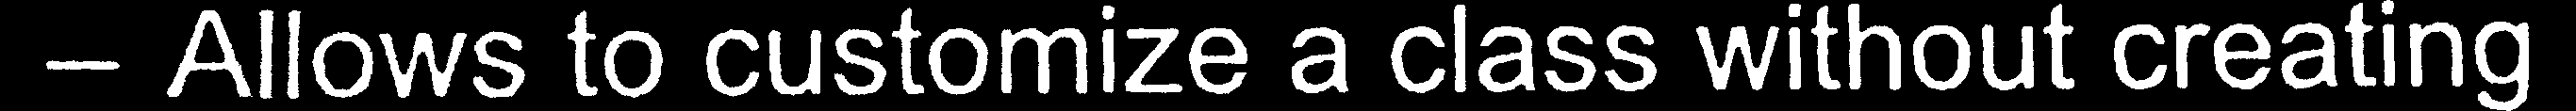

(95, 399)


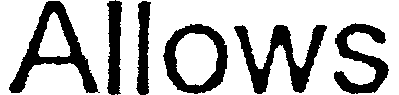

(93, 120)


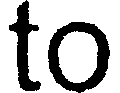

(95, 593)


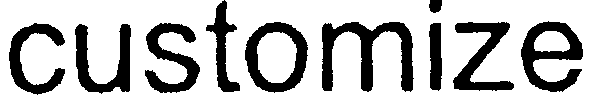

(70, 79)


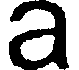

(94, 301)


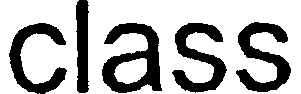

(92, 420)


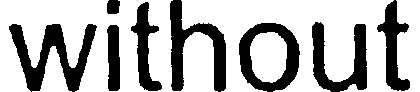

(115, 459)


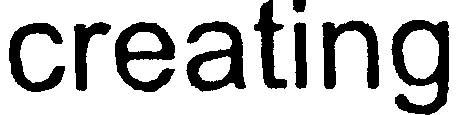

7


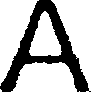

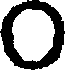

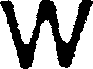

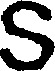

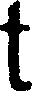

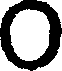

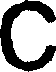

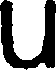

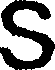

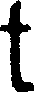

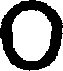

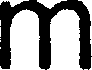

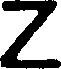

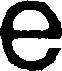

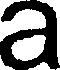

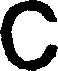

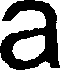

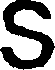

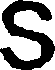

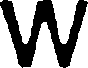

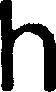

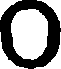

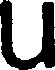

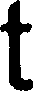

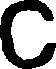

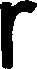

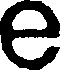

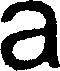

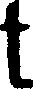

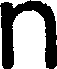

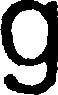

(130, 2626)


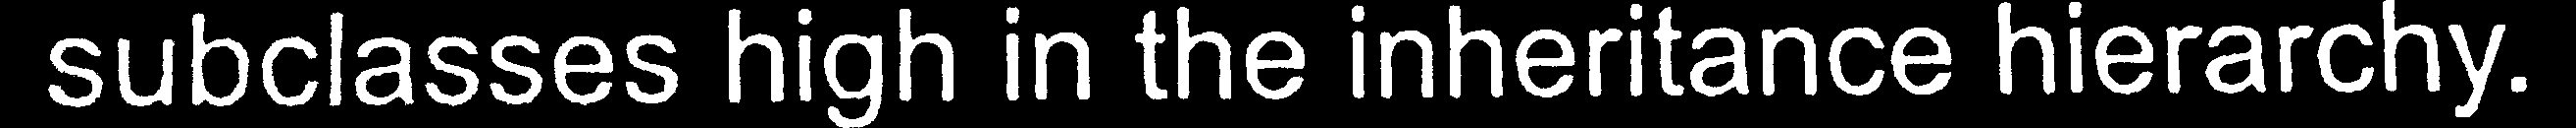

(97, 661)


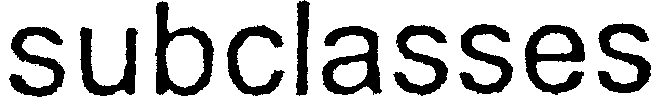

(121, 249)


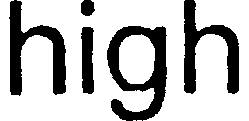

(69, 104)


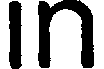

(94, 192)


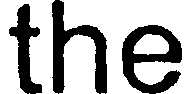

(96, 631)


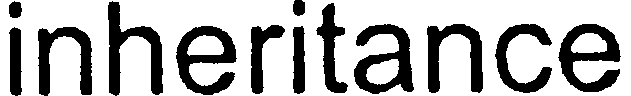

(119, 536)


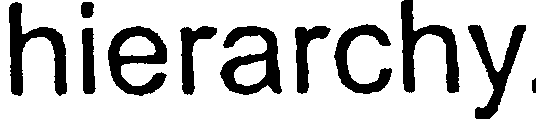

6


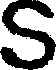

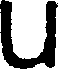

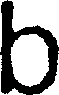

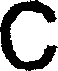

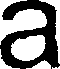

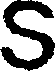

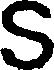

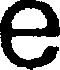

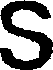

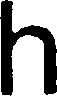

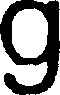

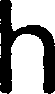

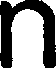

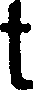

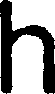

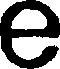

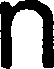

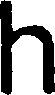

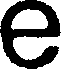

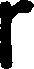

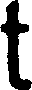

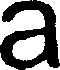

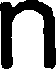

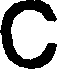

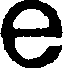

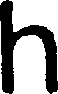

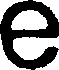

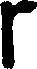

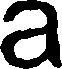

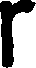

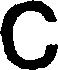

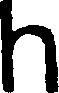

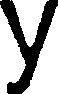

(34, 72)


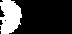

(34, 32)


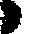

1


(123, 3092)


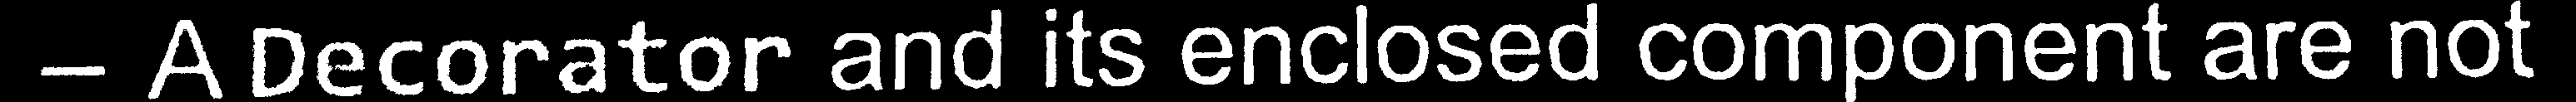

(96, 108)


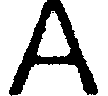

(83, 224)


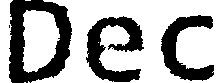

(66, 153)


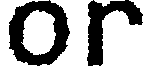

(88, 149)


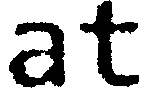

(67, 152)


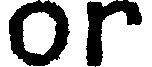

(98, 223)


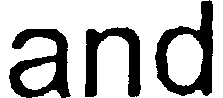

(94, 138)


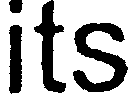

(98, 519)


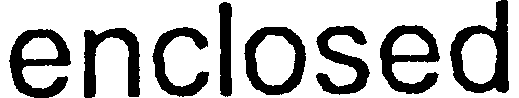

(120, 658)


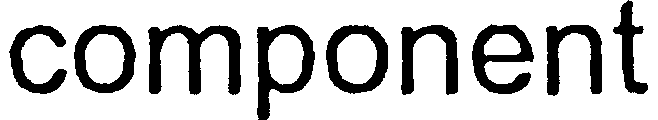

(71, 195)


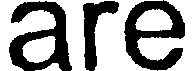

(95, 192)


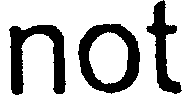

11


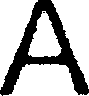

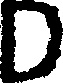

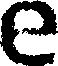

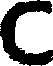

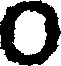

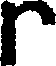

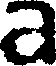

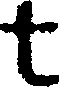

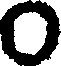

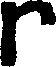

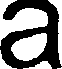

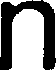

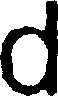

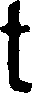

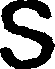

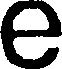

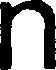

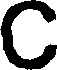

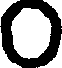

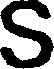

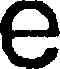

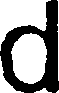

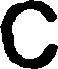

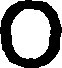

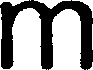

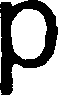

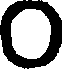

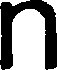

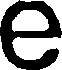

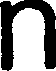

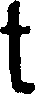

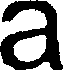

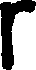

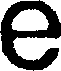

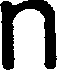

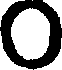

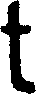

(126, 2650)


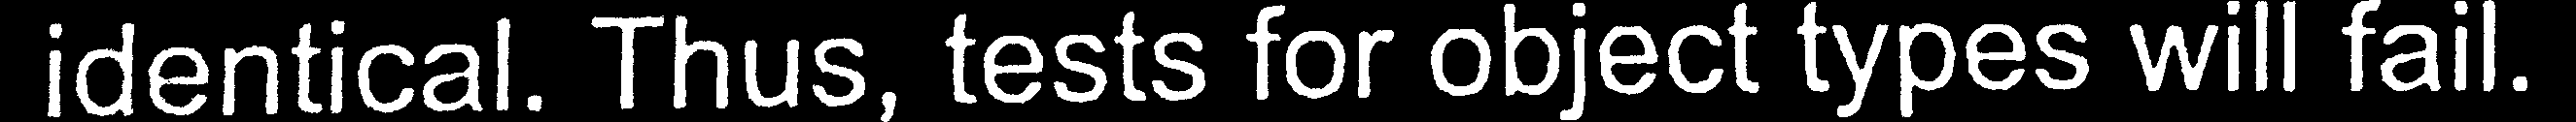

(103, 528)


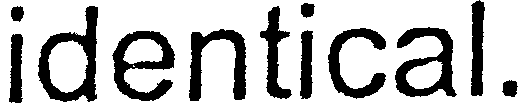

(110, 333)


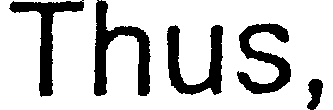

(95, 287)


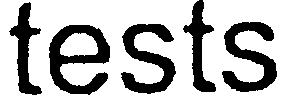

(98, 171)


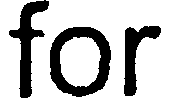

(121, 357)


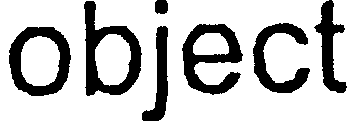

(119, 319)


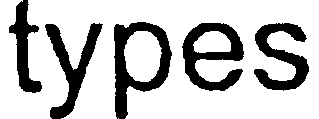

(94, 190)


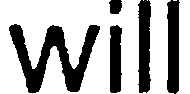

(95, 210)


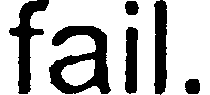

8


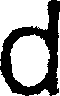

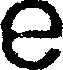

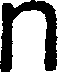

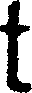

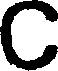

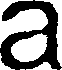

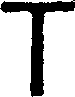

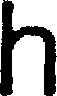

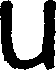

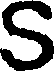

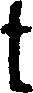

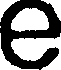

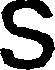

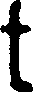

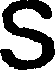

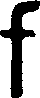

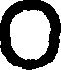

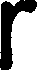

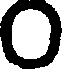

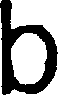

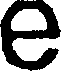

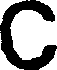

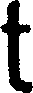

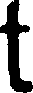

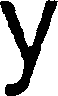

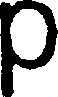

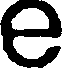

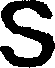

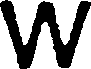

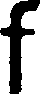

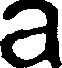

(130, 3144)


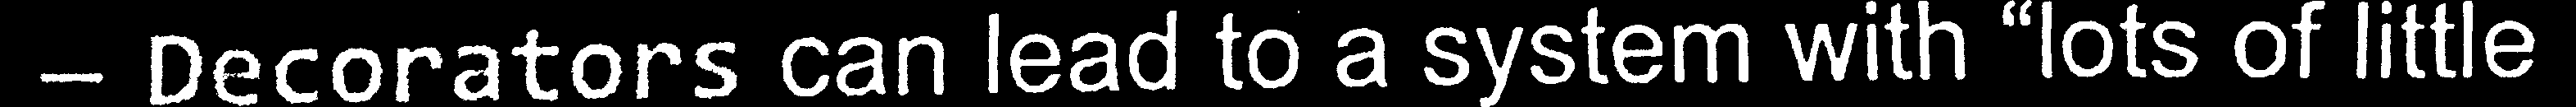

(87, 224)


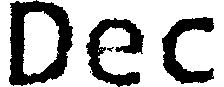

(68, 154)


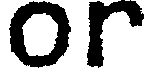

(87, 147)


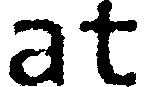

(69, 222)


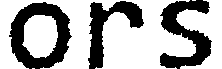

(73, 217)


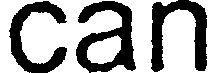

(100, 249)


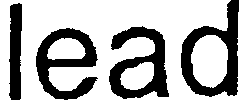

(93, 120)


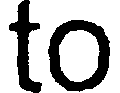

(72, 81)


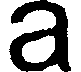

(121, 415)


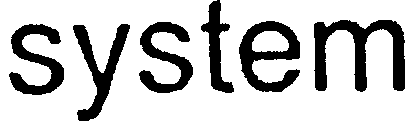

(97, 240)


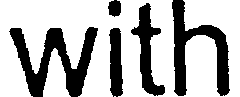

(95, 258)


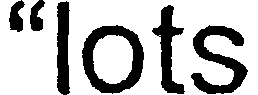

(94, 130)


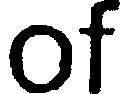

(95, 237)


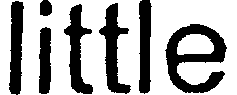

13


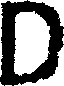

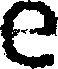

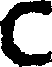

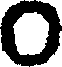

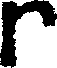

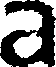

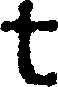

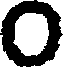

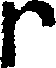

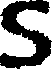

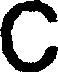

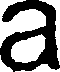

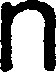

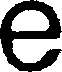

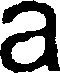

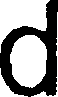

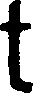

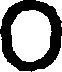

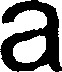

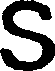

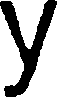

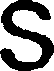

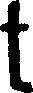

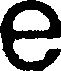

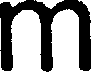

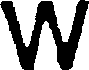

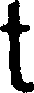

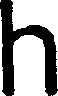

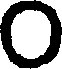

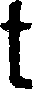

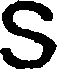

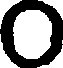

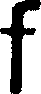

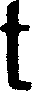

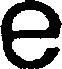

(156, 3159)


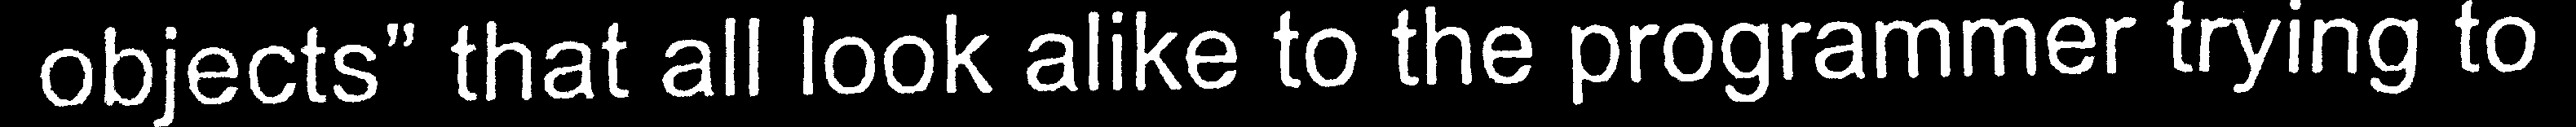

(123, 433)


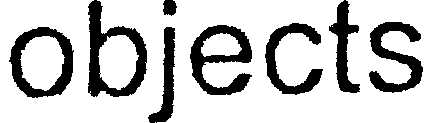

(98, 237)


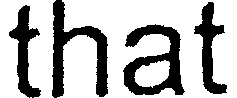

(97, 139)


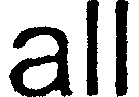

(100, 251)


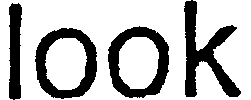

(98, 277)


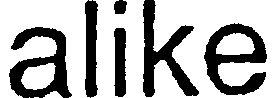

(95, 122)


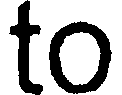

(97, 191)


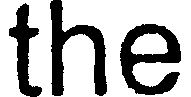

(108, 712)


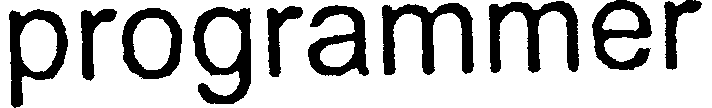

(115, 327)


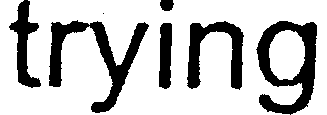

(89, 117)


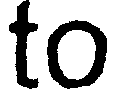

10


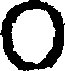

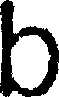

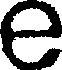

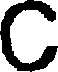

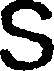

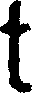

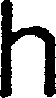

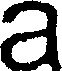

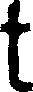

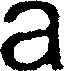

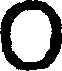

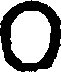

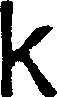

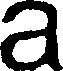

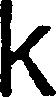

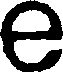

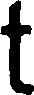

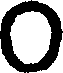

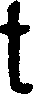

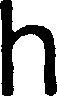

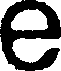

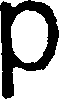

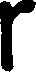

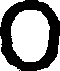

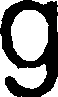

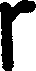

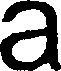

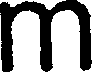

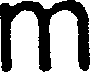

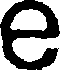

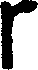

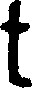

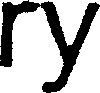

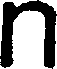

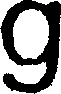

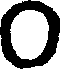

(111, 1134)


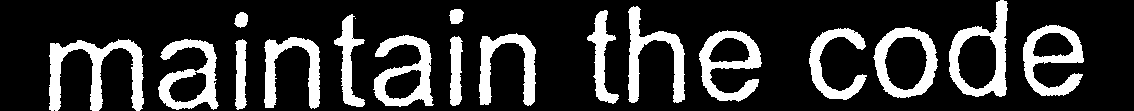

(97, 506)


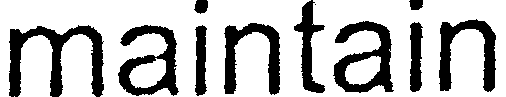

(98, 194)


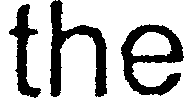

(100, 294)


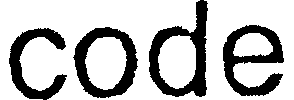

3


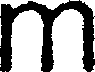

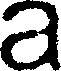

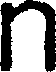

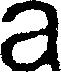

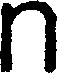

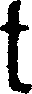

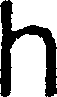

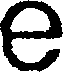

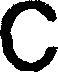

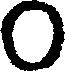

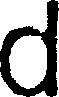

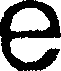

ww i PrOVldeS a mOre fleXlble Way tO add reSpOnSlbliltleS tO a ClaSS than by USlDg lnherltanCe SlDCe lt CaD add theSe reSpODSlbllltleS tO SeieCted lnStanCeS Of the ClaSS AlIOWS tO CUStOmlZe a ClaSS Wlth0Ut CreatlDg SUbClaSSeS hlgi l0 the lDherltaDCe hlerarChy l A uEC Or at Or aDd ltS eOClOSed COmpODeOt are DOt ldentlCal ThUSl teStS fOr ObjeCt typeS Wlll fall DeC Or at OrS CaD lead tO a SyStem Wlth ftlOtS Ot llttle ObJeCtS tiat all lOOk allke tO the prOgrammer tWlng tO malOtalO tie COba
#################
76.38461538461539
48.79900744416874


In [10]:
##########################################
#predict 
######################################
lines=[]
result=[]
roi_number = 0
ROI_number = 0
roi2_number = 0
width=0
height=0
results=np.array([[0,0,0,0]])
image = cv2.imread('/content/drive/MyDrive/images/phone_text4.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# ratio=100/avg_line_height
# gray=cv2.resize(gray,(np.int(gray.shape[1]*ratio),np.int(gray.shape[0]*ratio)), interpolation = cv2.INTER_LINEAR)
image_h=gray.shape[0]
image_w=gray.shape[1]
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,12)
clone=np.copy(thresh)
cv2_imshow(thresh)
kernel = np.ones((1,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2_imshow(img_dilation)
ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sort_contours(ctrs,"top-to-bottom")[0]
img1=255-thresh
for i, ctr in enumerate(sorted_ctrs):
  x, y, w, h = cv2.boundingRect(ctr)
  if h < np.round(image_h/100):
    continue
  roi = img1[y:y+h, x:x+w]
  cv2.imwrite('image_{}.png'.format(ROI_number), roi)
  roi_number += 1
  cv2.rectangle(clone,(x,y),( x + w, y + h ),(90,0,255),5)
  cv2.waitKey(0)
  cv2_imshow(roi)
  cv2.waitKey(0)
  lines.append(roi)
cv2_imshow(clone)
for line in lines:
  print(line.shape)
  line_h=line.shape[0]
  gray2=line
  thresh2 = cv2.adaptiveThreshold(gray2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,8)
  cv2_imshow(thresh2)
  kernel2 = np.ones((1,20), np.uint8)
  img_dilation2 = cv2.dilate(thresh2, kernel2, iterations=1)
  ctrs2, hier2 = cv2.findContours(img_dilation2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  sorted_ctrs2 = sort_contours(ctrs2)[0]
  words_in_line=[]
  img2=255-thresh2
  roi2_number=0
  for i, ctr2 in enumerate(sorted_ctrs2):
    x, y, w, h = cv2.boundingRect(ctr2)
    if h<np.round(30):
      continue
    roi2 = img2[y:y+h, x:x+w]
    print(roi2.shape)
    roi2_number += 1
    cv2_imshow(roi2)
    words_in_line.append(roi2)

################################################
  print(len(words_in_line))
  for word in words_in_line:
    original_h=[]
    original_w=[]
    copyROIs=[]
    original = word.copy()
    gray3=word
    thresh3 = cv2.adaptiveThreshold(gray3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,20)
    imgs=[]
    cnts3 = cv2.findContours(thresh3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts3 = cnts3[0] if len(cnts3) == 2 else cnts3[1]
    sorted_cnts3 = sort_contours(cnts3)[0]
    for c in sorted_cnts3:
      x,y,w,h = cv2.boundingRect(c)
      if h >= np.round(line_h/5) and h <= 120:
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = original[y:y+h, x:x+w]
        original_h.append(ROI.shape[0])
        original_w.append(ROI.shape[1])
        cv2_imshow(ROI)
        ROI = cv2.resize(ROI, (60,60), interpolation = cv2.INTER_LINEAR)
        copyROIs.append(ROI.copy())
        ROI = np.expand_dims(ROI, 2)
        for i in range(ROI.shape[1]):
          for j in range(ROI.shape[0]):
            if ROI[i,j]<190 and ROI[i,j]>=170:
              ROI[i,j]= np.round(ROI[i,j]*0.3) 
            elif ROI[i,j]<170:
              ROI[i,j]=0
            elif ROI[i,j]<210 and ROI[i,j]>=190:
              ROI[i,j]= np.round(ROI[i,j]*0.6) 
        imgs.append(ROI)
        ROI_number += 1
    chars=(255-np.array(imgs))/255
    
    if(len(chars)>=1):
      preds=np.argmax(model.predict(chars),axis=1)
      probs=np.max(model.predict(chars),axis=1)
      w=""
      k=0
      for pred in preds:
        label = labelNames[pred]
        w+=label
        results=np.append(results,[[label,original_h[k],original_w[k],copyROIs[k]]],axis=0)
        height+=original_h[k]
        width+=original_w[k]
        k+=1;
      result.append(w)
      results=np.append(results,[[" "," "," "," "]],axis=0)
print(" ".join(result))
print("#################")
print(height/ROI_number)
print(width/ROI_number)
results=np.delete(results,0,0)

In [ ]:
results[:,0]

array(['P', 'r', '0', 'b', 'a', 'b', 'l', 'l', 'l', 't', 'y', ' ', 't',
       'h', 'e', '0', 'r', 'y', ' ', 'l', 'S', ' ', 't', 'h', 'O', ' ',
       'S', 't', 'u', 'd', 'y', ' ', '0', 'f', ' ', 'U', 'n', 'C', 'e',
       'r', 't', 'a', 'l', 'n', 't', 'y', ' ', 'T', 'M', '0', 'u', 'g',
       'h', ' ', 't', 'h', 'l', 'S', ' ', 'C', 'l', 'a', 'S', 'S', 'i',
       ' ', 'W', 'e', ' ', 'W', 'l', 'l', 'l', ' ', 'b', 'b', ' ', 'r',
       'e', 'l', 'y', 'l', 'n', 'g', ' ', '0', 'n', ' ', 'C', '0', 'n',
       'C', 'e', 'p', 't', 'S', ' ', 'f', 'r', '0', 'm', ' ', 'p', 'r',
       '0', 'b', 'a', 'b', 'l', 'l', 'l', 't', 'y', ' ', 't', 'h', 'e',
       'O', 'W', ' ', 'f', '0', 'r', ' ', 'd', 'e', 'n', 'V', 'l', 'n',
       'g', ' ', 'm', 'a', 'C', 'h', 'l', 'n', 'b', ' ', 'l', 'e', 'n',
       'l', 'n', 'g', ' ', 'a', 'l', 'g', '0', 'r', 'l', 't', 'h', 'm',
       'S', ' ', 'T', 'h', 'b', 'S', 'b', ' ', 'n', 'O', 't', 'e', 'S',
       ' ', 'a', 't', 't', 'b', 'm', 'p', 't', ' ', 't', 'O', ' 

In [ ]:
il=np.mean((np.array(results[:,1])[[i for i,v in enumerate(results[:,0]) if v=='i' or v=='l']]).astype(np.float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
il

67.82

In [ ]:
resultss=""

In [ ]:
numbers=['1','2','3','4','5','6','7','8','9']
wide_chars=['C',  'T', 'W', 'w','P','A']

0


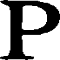

P
1


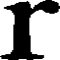

r
2


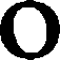

o
3


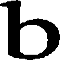

b
4


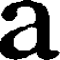

a
5


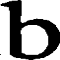

b
6


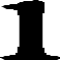

i
7


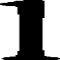

l
8


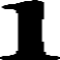

i
9


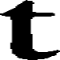

t
10


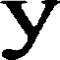

y
11
 
12


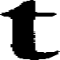

t
13


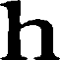

h
14


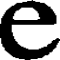

e
15


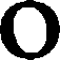

o
16


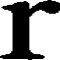

r
17


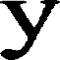

y
18
 
19


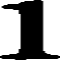

i
20


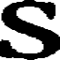

S
21
 
22


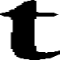

t
23


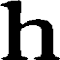

h
24


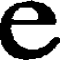

O
25
 
26


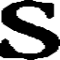

S
27


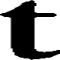

t
28


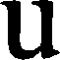

u
29


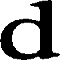

d
30


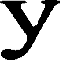

y
31
 
32


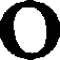

o
33


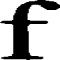

f
34
 
35


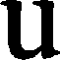

U
36


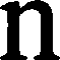

n
37


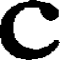

C
38


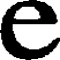

e
39


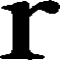

r
40


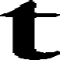

t
41


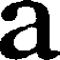

a
42


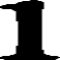

i
43


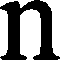

n
44


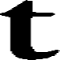

t
45


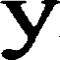

y
46
 
47


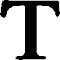

T
48


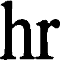

(60, 60)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


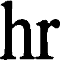

(60, 35)


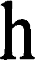

(60, 25)


h
e
he
he
49


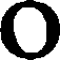

o
50


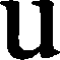

u
51


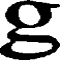

g
52


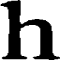

h
53
 
54


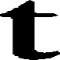

t
55


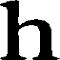

h
56


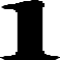

i
57


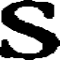

S
58
 
59


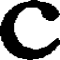

C
60


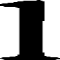

l
61


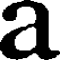

a
62


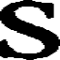

S
63


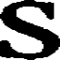

S
64


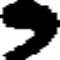

i
65
 
66


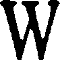

W
67


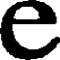

e
68
 
69


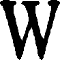

W
70


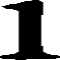

i
71


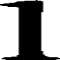

l
72


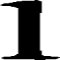

l
73
 
74


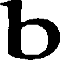

b
75


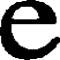

b
76
 
77


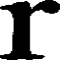

r
78


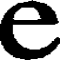

e
79


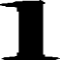

l
80


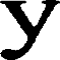

y
81


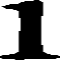

i
82


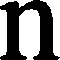

n
83


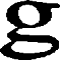

g
84
 
85


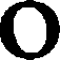

o
86


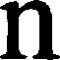

n
87
 
88


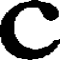

C
89


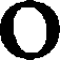

o
90


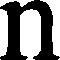

n
91


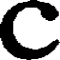

C
92


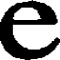

e
93


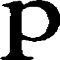

p
94


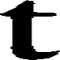

t
95


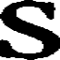

S
96
 
97


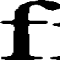

f
98


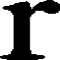

r
99


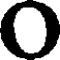

o
100


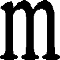

101
 
102


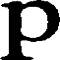

p
103


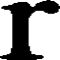

r
104


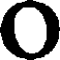

o
105


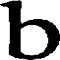

b
106


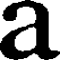

a
107


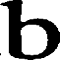

b
108


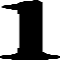

i
109


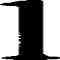

l
110


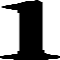

i
111


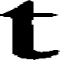

t
112


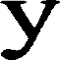

y
113
 
114


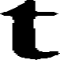

t
115


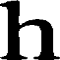

h
116


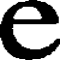

e
117


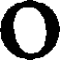

O
118


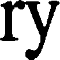

W
119
 
120


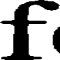

f
121


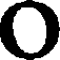

o
122


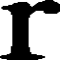

r
123
 
124


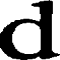

d
125


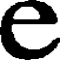

e
126


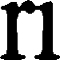

(60, 60)


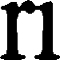

(60, 35)


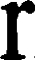

(60, 25)


r
l
rl
rl
127


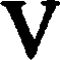

V
128


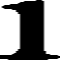

i
129


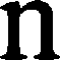

n
130


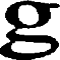

g
131
 
132


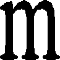

133


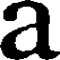

a
134


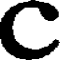

C
135


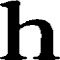

h
136


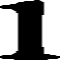

i
137


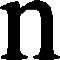

n
138


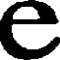

b
139
 
140


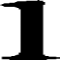

l
141


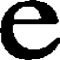

e
142


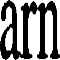

(60, 60)


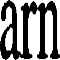

(60, 19)


(60, 41)


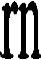

a
m
am
am
143


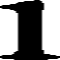

i
144


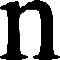

n
145


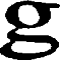

g
146
 
147


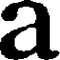

a
148


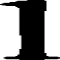

l
149


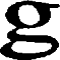

g
150


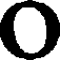

o
151


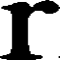

r
152


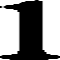

i
153


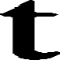

t
154


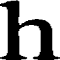

h
155


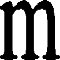

156


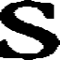

S
157
 
158


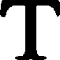

T
159


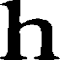

h
160


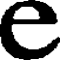

b
161


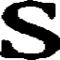

S
162


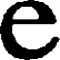

b
163
 
164


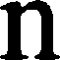

n
165


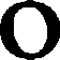

O
166


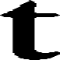

t
167


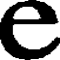

e
168


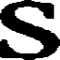

S
169
 
170


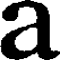

a
171


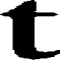

t
172


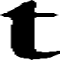

t
173


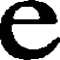

b
174


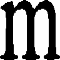

175


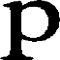

p
176


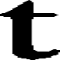

t
177
 
178


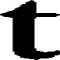

t
179


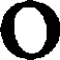

O
180
 
181


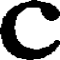

C
182


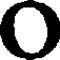

O
183


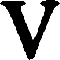

V
184


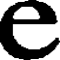

b
185


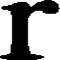

r
186
 
187


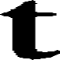

t
188


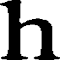

h
189


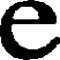

b
190
 
191


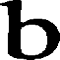

b
192


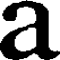

a
193


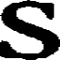

S
194


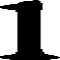

i
195


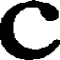

C
196


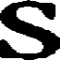

S
197
 
198


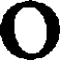

o
199


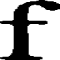

f
200
 
201


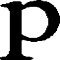

p
202


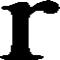

r
203


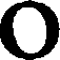

o
204


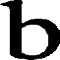

b
205


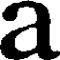

a
206


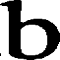

b
207


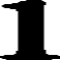

i
208


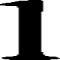

l
209


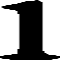

i
210


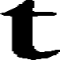

t
211


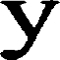

y
212
 
213


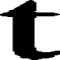

t
214


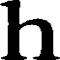

h
215


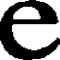

b
216


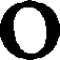

o
217


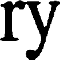

(60, 60)


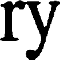

(60, 25)


(60, 35)


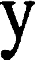

r
y
ry
ry
218
 
219


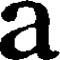

a
220


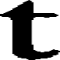

t
221
 
222


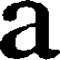

a
223
 
224


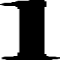

l
225


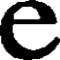

e
226


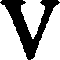

V
227


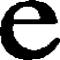

e
228


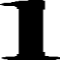

l
229
 
230


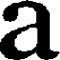

a
231


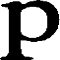

p
232


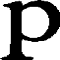

p
233


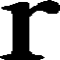

r
234


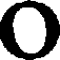

o
235


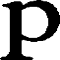

p
236


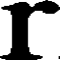

r
237


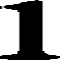

i
238


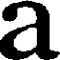

a
239


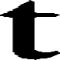

t
240


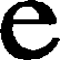

e
241
 
242


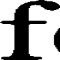

f
243


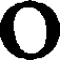

o
244


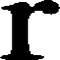

r
245
 
246


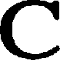

C
247


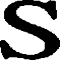

S
248
 
249


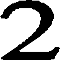

2
250


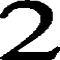

2
251


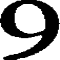

9
252
 
253


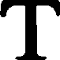

T
254


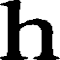

h
255


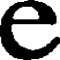

b
256
 
257


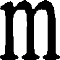

258


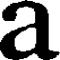

a
259


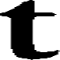

t
260


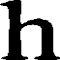

h
261


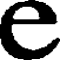

b
262


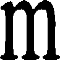

263


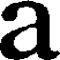

a
264


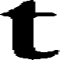

t
265


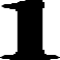

i
266


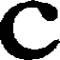

C
267


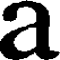

a
268


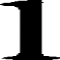

l
269
 
270


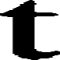

t
271


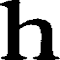

h
272


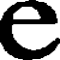

b
273


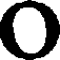

o
274


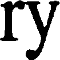

(60, 60)


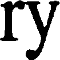

(60, 25)


(60, 35)


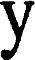

r
y
ry
ry
275
 
276


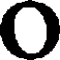

O
277


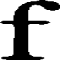

f
278
 
279


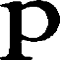

p
280


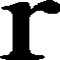

r
281


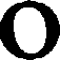

o
282


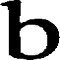

b
283


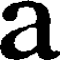

a
284


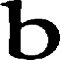

b
285


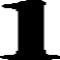

i
286


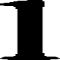

l
287


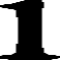

i
288


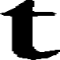

t
289


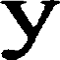

y
290
 
291


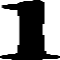

i
292


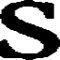

S
293
 
294


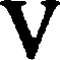

V
295


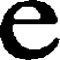

e
296


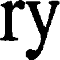

(60, 60)


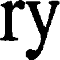

(60, 25)


(60, 35)


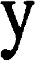

r
y
ry
ry
297
 
298


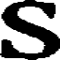

S
299


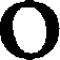

o
300


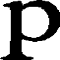

p
301


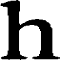

h
302


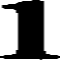

i
303


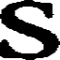

S
304


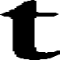

t
305


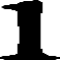

i
306


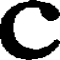

C
307


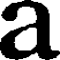

a
308


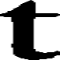

t
309


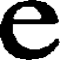

e
310


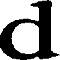

d
311


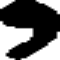

i
312
 
313


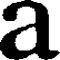

a
314


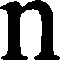

n
315


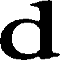

d
316
 
317


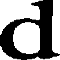

d
318


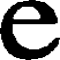

e
319


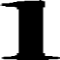

l
320


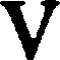

V
321


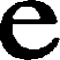

b
322


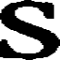

S
323
 
324


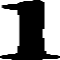

i
325


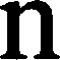

n
326


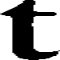

t
327


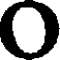

O
328
 
329


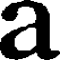

a
330
 
331


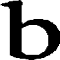

b
332


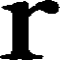

r
333


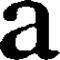

a
334


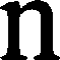

n
335


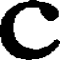

C
336


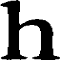

h
337
 
338


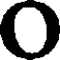

o
339


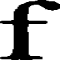

f
340
 
341


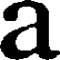

a
342


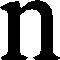

n
343


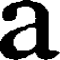

a
344


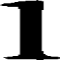

l
345


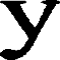

y
346


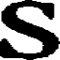

S
347


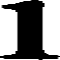

i
348


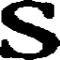

S
349
 
350


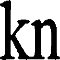

W
351


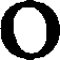

o
352


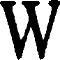

W
353


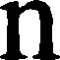

n
354
 
355


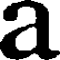

a
356


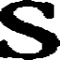

S
357
 
358


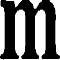

359


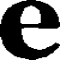

e
360


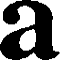

a
361


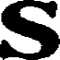

S
362


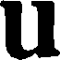

u
363


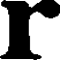

r
364


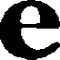

e
365
 
366


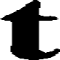

t
367


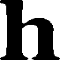

(60, 60)


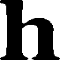

(60, 28)


(60, 32)


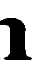

l
i
li
li
368


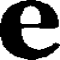

e
369


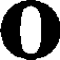

o
370


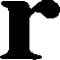

r
371


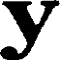

y
372
 
373


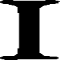

l
374


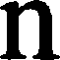

n
375
 
376


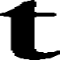

t
377


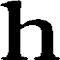

h
378


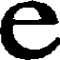

e
379


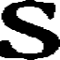

S
380


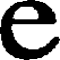

b
381
 
382


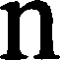

n
383


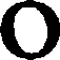

O
384


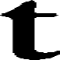

t
385


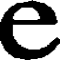

e
386


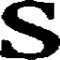

S
387


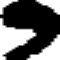

i
388
 
389


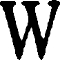

W
390


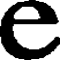

e
391
 
392


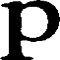

p
393


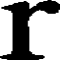

r
394


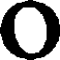

o
395


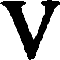

V
396


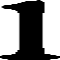

i
397


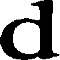

d
398


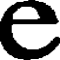

b
399
 
400


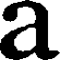

a
401
 
402


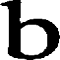

b
403


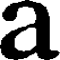

a
404


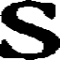

S
405


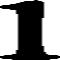

i
406


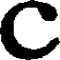

C
407
 
408


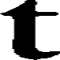

t
409


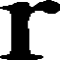

r
410


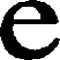

e
411


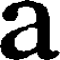

a
412


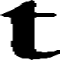

t
413


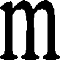

414


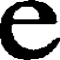

b
415


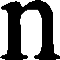

n
416


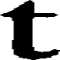

t
417
 
418


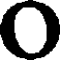

o
419


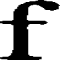

f
420
 
421


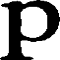

p
422


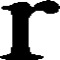

r
423


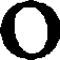

o
424


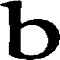

b
425


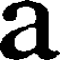

a
426


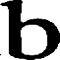

b
427


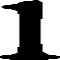

i
428


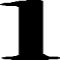

l
429


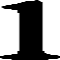

i
430


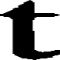

t
431


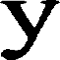

y
432
 
433


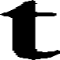

t
434


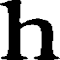

h
435


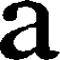

a
436


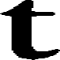

t
437
 
438


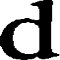

d
439


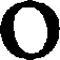

O
440


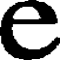

b
441


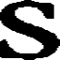

S
442
 
443


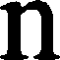

n
444


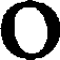

o
445


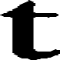

t
446
 
447


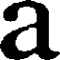

a
448


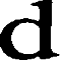

d
449


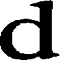

d
450


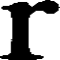

r
451


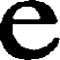

e
452


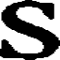

S
453


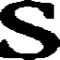

S
454
 
455


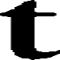

t
456


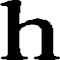

h
457


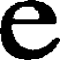

b
458


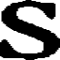

S
459


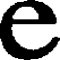

b
460
 
461


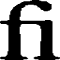

b
462


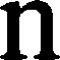

n
463


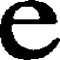

b
464


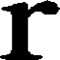

r
465
 
466


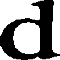

d
467


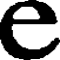

b
468


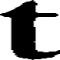

t
469


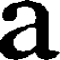

a
470


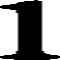

i
471


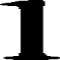

l
472


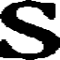

S
473
 
probability theory is tho study of uncertainty theough this classi we will bb relying on concepts from probability theow for derlving machinb leaming algorithms thbsb notes attbmpt to covbr thb basics of probability thbory at a level appropriate for cs 229 thb mathbmatical thbory of probability is very sophisticatedi and delvbs into a branch of analysis wown as measure tlieory ln thesb notesi we providb a basic treatmbnt of probability that dobs not address thbsb bnbr dbtails 


In [ ]:
for i in range(results.shape[0]):
  print(i)
  if type(results[i,2])!=str:
    cv2_imshow(results[i,3])
  if results[i,0]=='i' or results[i,0]=='l' or results[i,0]=='I':
    if results[i,1]<=il:
      results[i,0]='i'
    elif results[i,1]>il:
      results[i,0]='l'
  if results[i,0]=='m':
    resultss+=results[i,0]
    continue
  # if type(results[i,2])!=str and results[i,2]>=(width/ROI_number*1.3)and results[i,0] not in wide_chars:
  #   images=[]
  #   image = results[i,3]
  #   image_w=image.shape[1]
  #   print(image.shape)
  #   a=np.abs(np.sum(image,axis=0).argsort()[-10:][::-1])
  #   index=np.int(image_w/2)
  #   # print(index)
  #   # print(a)
  #   for j in a:
  #     if j>60/5 and j<60*0.8:
  #       index=j
  #       break
  #   image1=image[:,:index]
  #   cv2_imshow(image)
  #   print(image1.shape)
  #   cv2_imshow(image1)
  #   image1 = cv2.resize(image1, (60,60), interpolation = cv2.INTER_LINEAR)
  #   images.append(image1)
  #   image2=image[:,index:]
  #   print(image2.shape)
  #   cv2_imshow(image2)
  #   image2 = cv2.resize(image2, (60,60), interpolation = cv2.INTER_LINEAR)
  #   images.append(image2)
  #   chars=255-np.array(images)
  #   preds=np.argmax(model.predict(chars),axis=1)
  #   chars=''
  #   for pred in preds:
  #     label = labelNames[pred]
  #     print(label)
  #     chars+=label
  #   results[i,0]=chars
  #   print(chars)
  # if results[i,0]=='in' or results[i,0]=='In' or results[i,0]=='ln' or results[i,0]=='1n' or results[i,0]=='rn' :
  #   results[i,0]='m'
  if results[i,0]=='.':
    if results[i-1,0]=='i' or results[i+1,0]=='i' or results[i+1,0]=='l':
      results[i,0]=''
  if results[i,0]=='0' and (results[i-1,0] not in numbers or results[i+1,0] not in numbers):
    results[i,0]='o'
  if results[i,0]=='1' and (results[i-1,0] not in numbers or results[i+1,0] not in numbers):
    results[i,0]='i'
  if results[i,0]=='5' and (results[i-1,0] not in numbers or results[i+1,0] not in numbers):
    results[i,0]='s'
  print(results[i,0])
  resultss+=results[i,0]
print(resultss.lower())

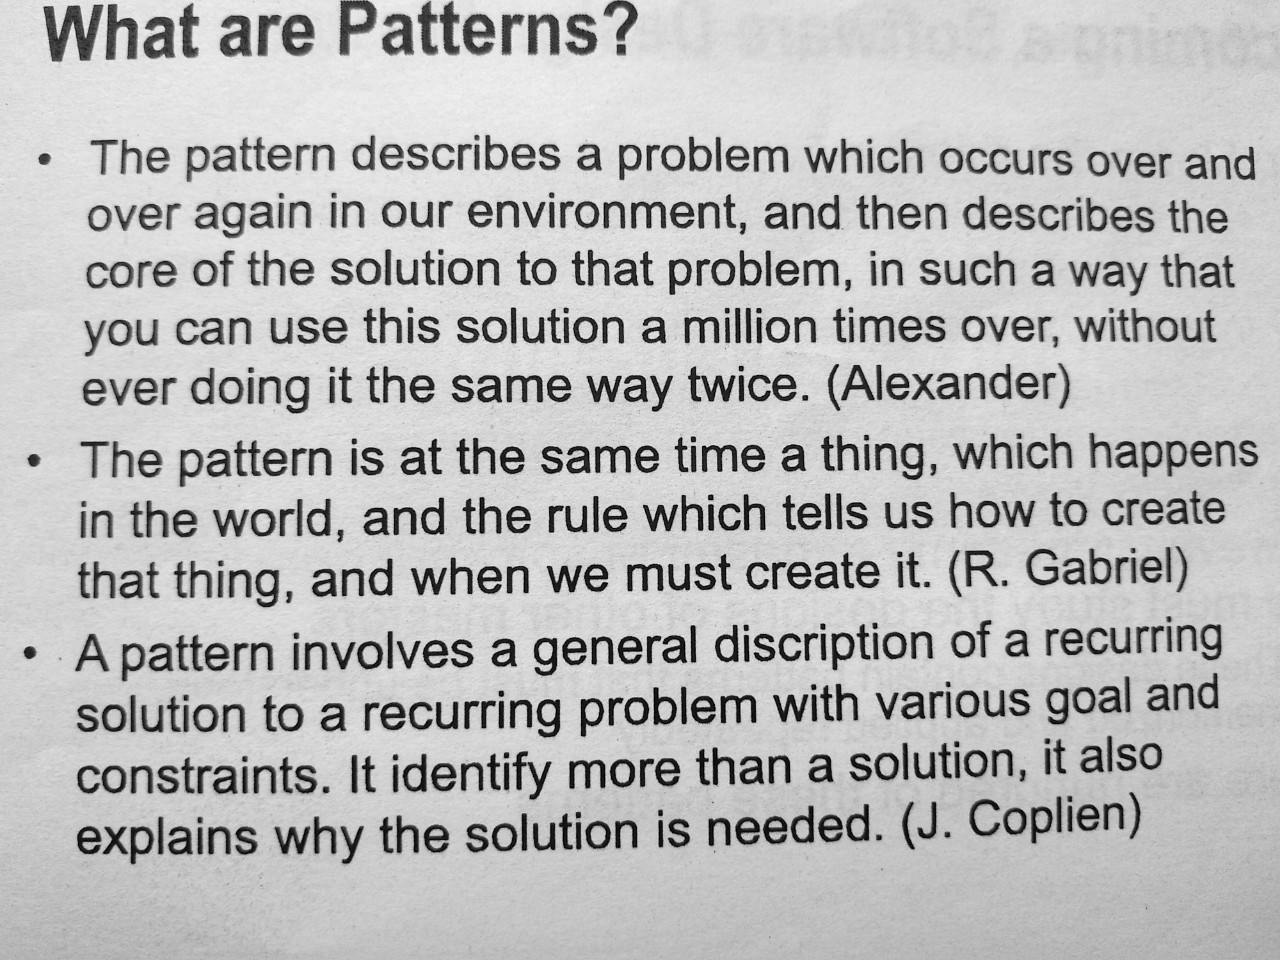

(960, 1280)


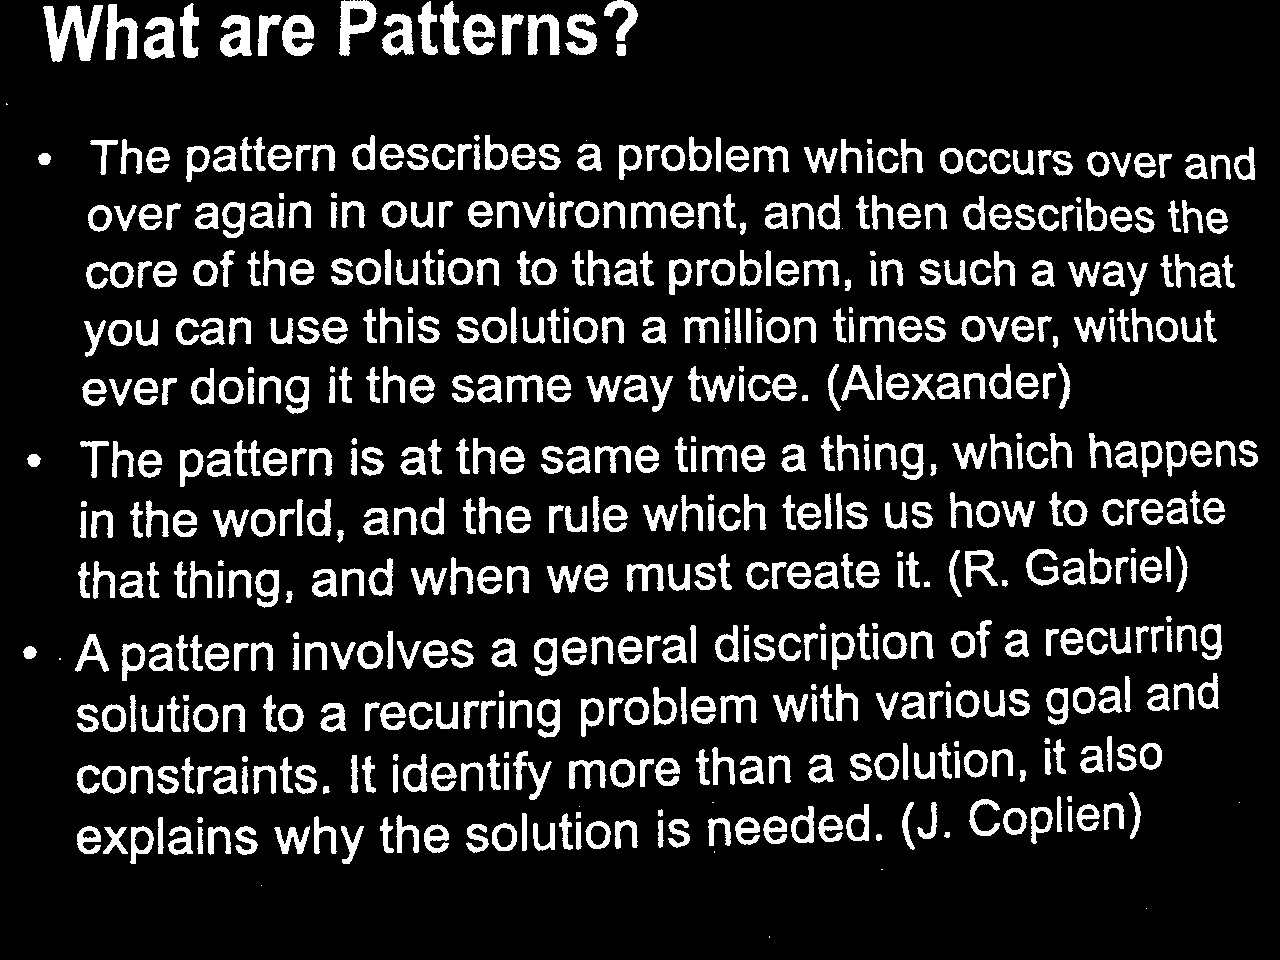

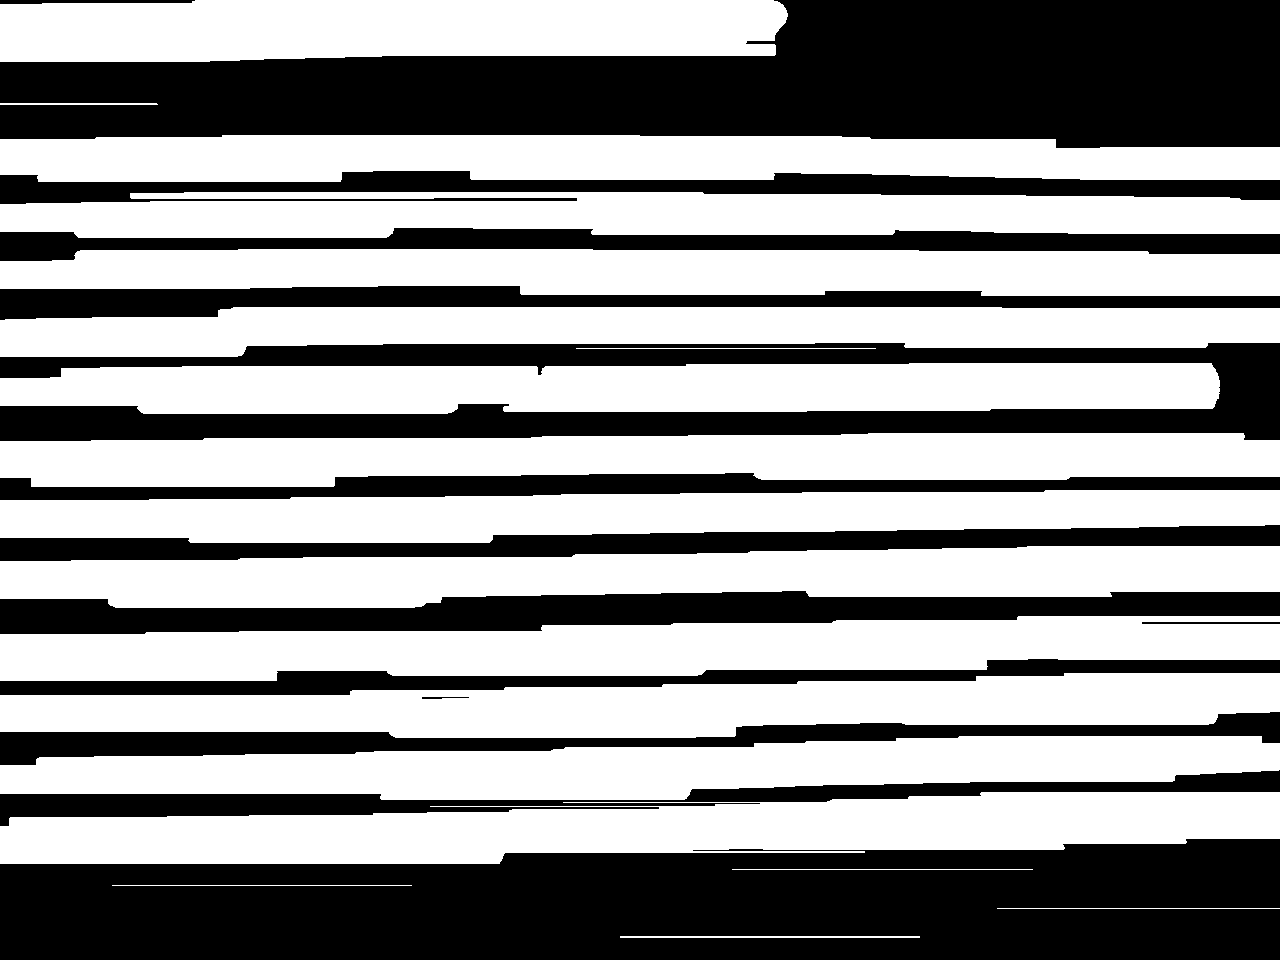

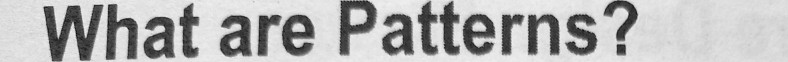

1
(62, 788)


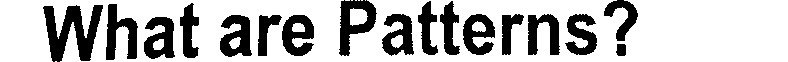

++++++++++


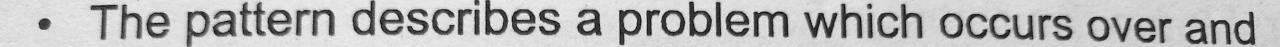

2
(47, 1280)


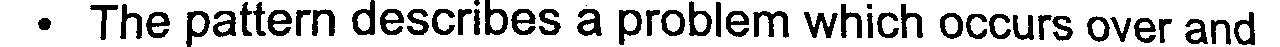

++++++++++


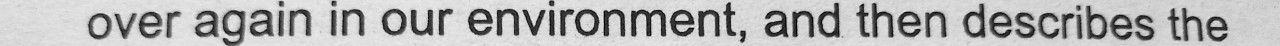

3
(46, 1280)


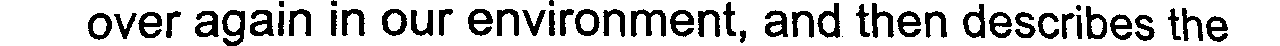

++++++++++


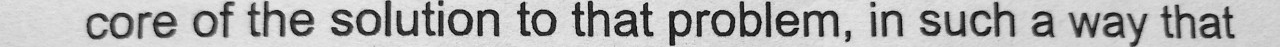

4
(47, 1280)


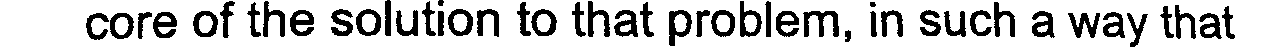

++++++++++


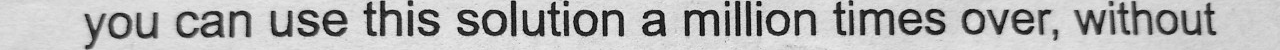

5
(50, 1280)


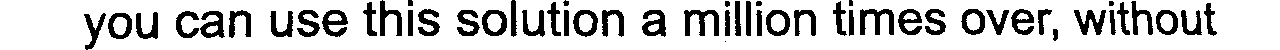

++++++++++


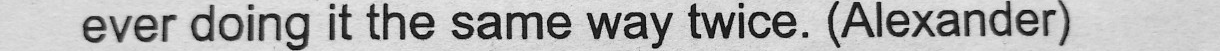

6
(51, 1220)


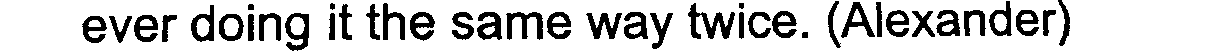

++++++++++


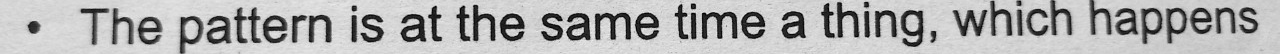

7
(54, 1280)


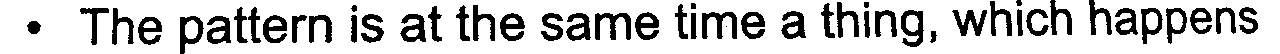

++++++++++


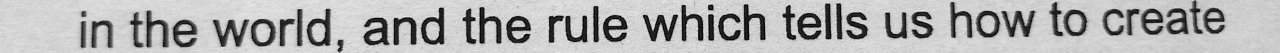

8
(53, 1280)


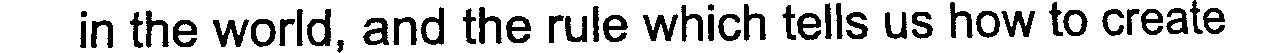

++++++++++


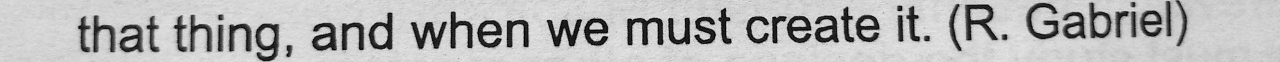

9
(62, 1280)


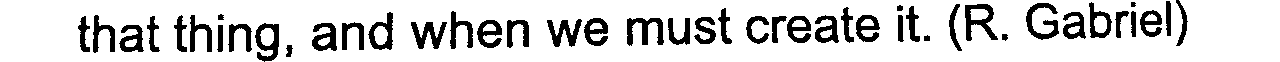

++++++++++


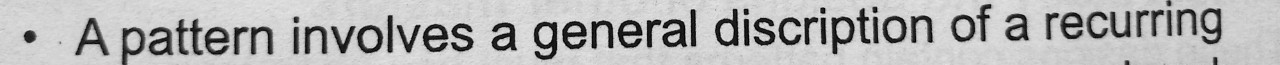

10
(65, 1280)


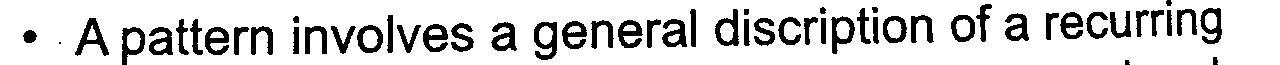

++++++++++


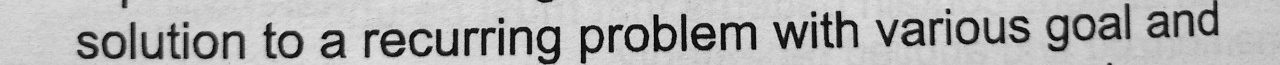

11
(65, 1280)


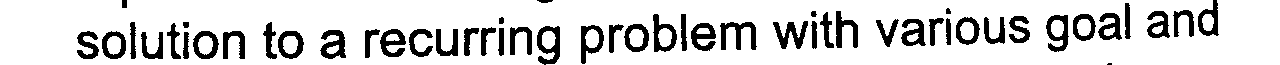

++++++++++


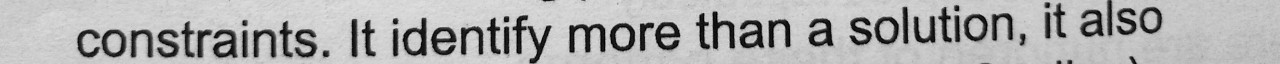

12
(64, 1280)


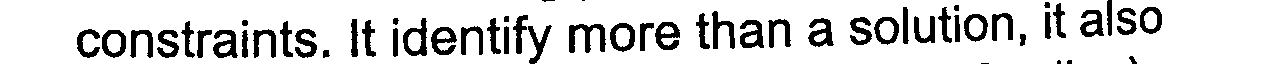

++++++++++


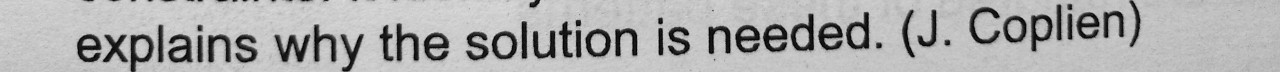

13
(72, 1280)


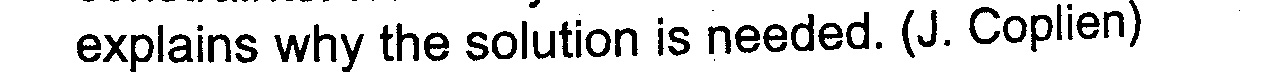

++++++++++
13


In [ ]:
##########################################
#cat van ban thanh tung dong
######################################
image = cv2.imread('/content/drive/MyDrive/images/phone_text7.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

cv2_imshow(gray)
print(gray.shape)


thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,121,35)
cv2_imshow(thresh)

kernel = np.ones((1,300), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2_imshow(img_dilation)


ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
width=0
height=0

sorted_ctrs = sort_contours(ctrs,"top-to-bottom")[0]
lines=[]
result=[]
roi_number = 0
ROI_number = 0
roi2_number = 0
img1=255-thresh
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
  x, y, w, h = cv2.boundingRect(ctr)

  if h < 10:
    continue
  roiroi=gray[y:y+h, x:x+w]
  cv2_imshow(roiroi)
  roi = img1[y:y+h, x:x+w]
    # cv2.imwrite('image_{}.png'.format(ROI_number), roi)
  roi_number += 1
    # show ROI
  print(roi_number)
  print(roi.shape)
  cv2_imshow(roi)
  # cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
  cv2.waitKey(0)
  cv2.imwrite('line_{}.png'.format(roi_number), roi)
  print("++++++++++")
  # print(roi.shape)
  # roi=cv2.resize(roi,(roi.shape[1]*2,roi.shape[0]*2), interpolation = cv2.INTER_AREA)
  lines.append(roi)
# cv2_imshow(image)
print(len(lines))

(47, 1280, 3)


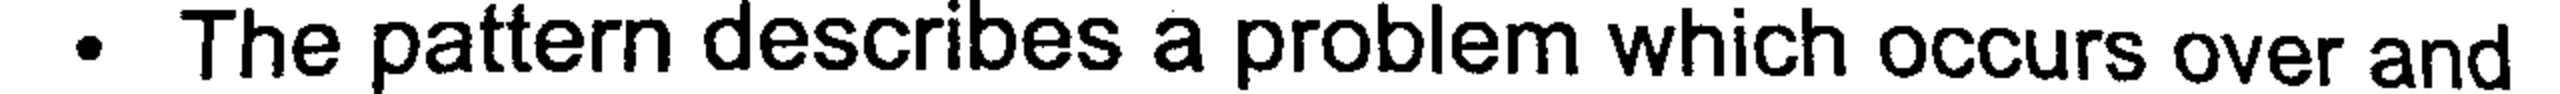

(94, 2560)


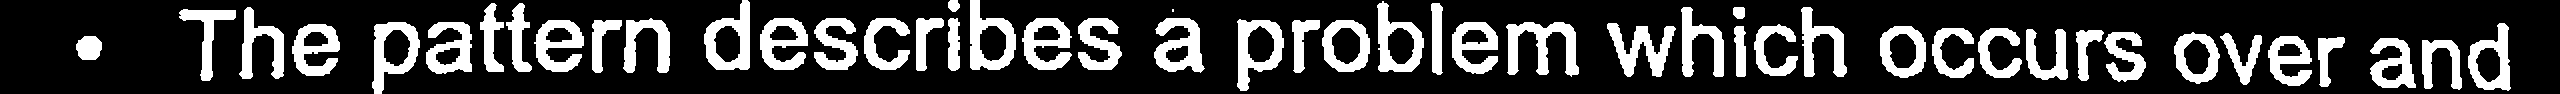

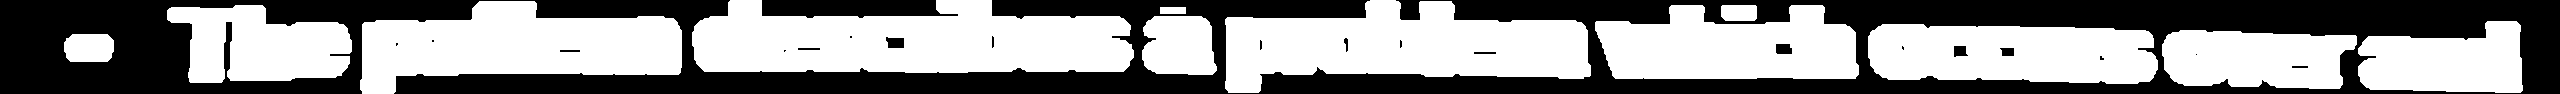

0
(28, 50)


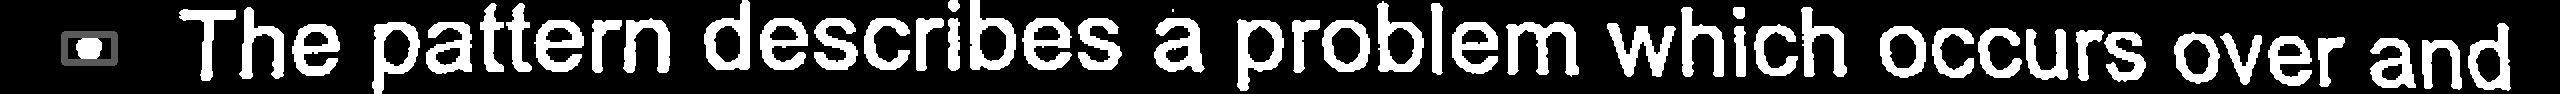

1
(78, 185)


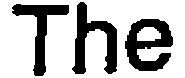

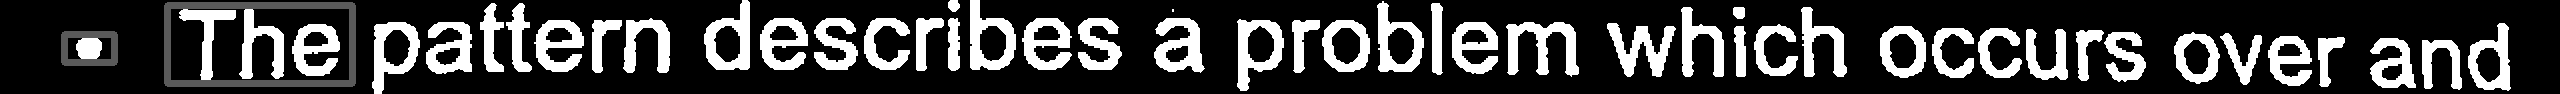

2
(93, 322)


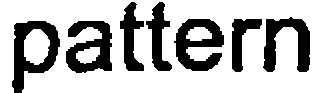

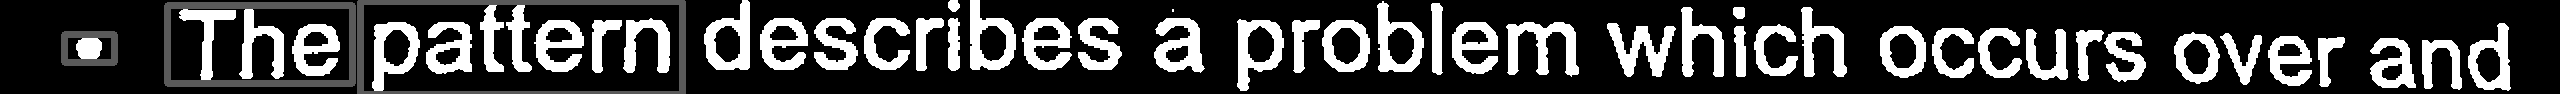

3
(73, 442)


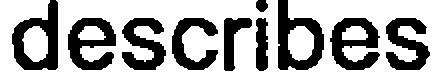

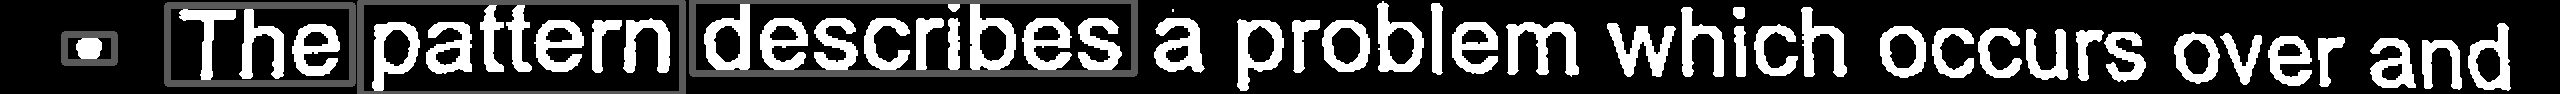

4
(59, 75)


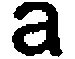

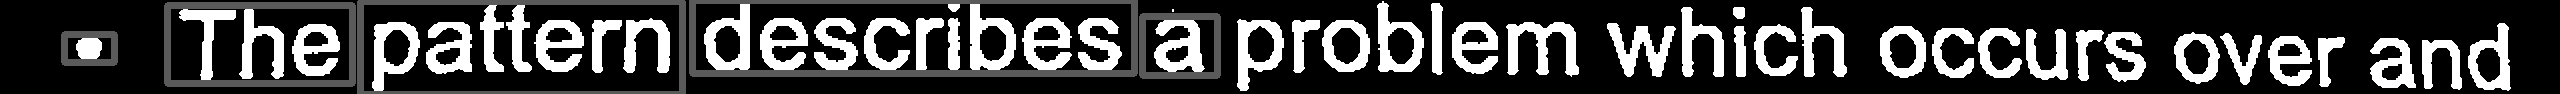

5
(93, 366)


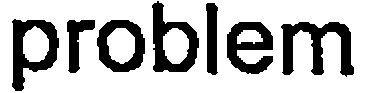

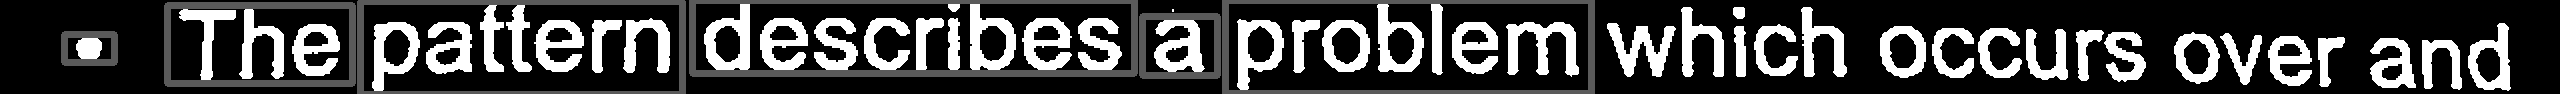

6
(74, 264)


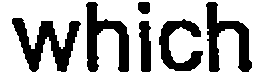

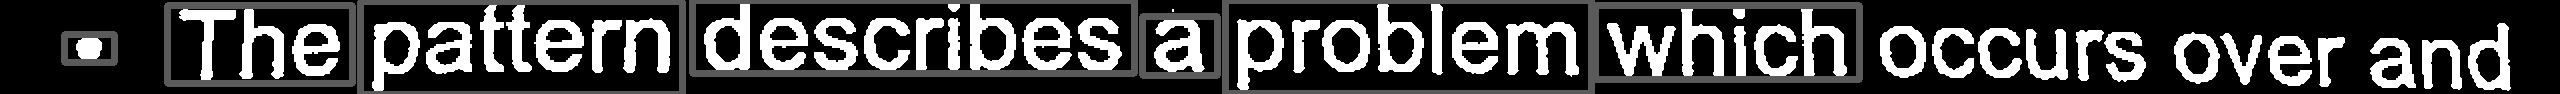

7
(16, 36)


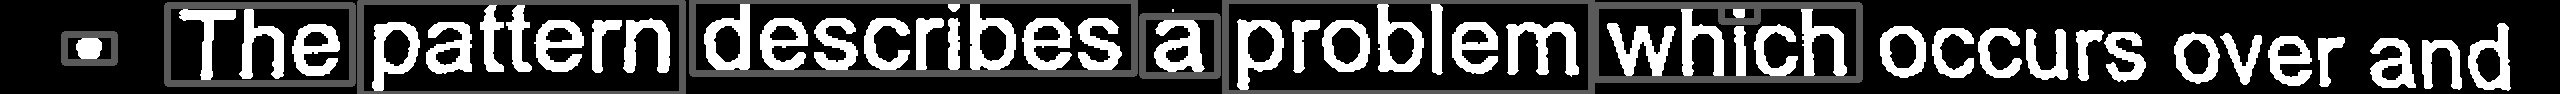

8
(60, 290)


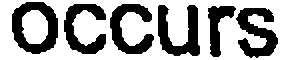

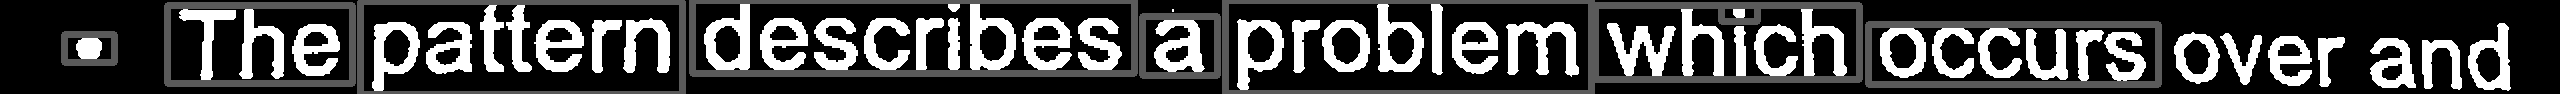

9
(59, 195)


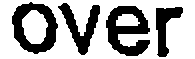

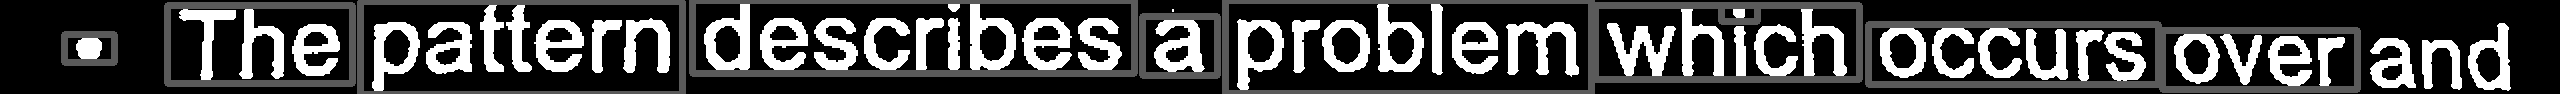

10
(72, 165)


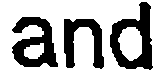

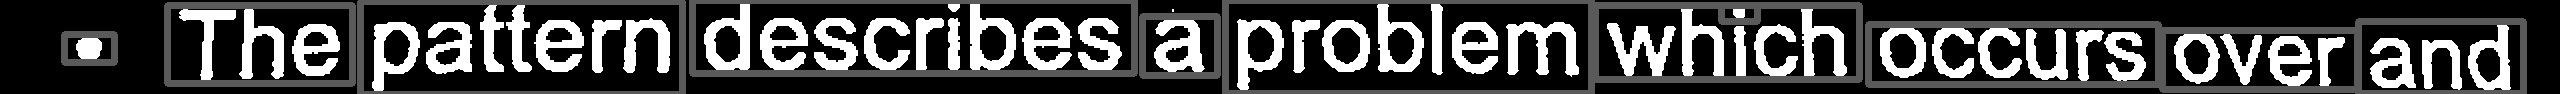

In [ ]:
line = cv2.imread('/content/line_2.png')
print(line.shape)

gray2 = cv2.cvtColor(line,cv2.COLOR_BGR2GRAY)
gray2=cv2.resize(gray2,(gray2.shape[1]*2,gray2.shape[0]*2), interpolation = cv2.INTER_LINEAR)
cv2_imshow(gray2)
print(gray2.shape)
# cv2.waitKey(0)

thresh2 = cv2.adaptiveThreshold(gray2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,8)
cv2_imshow(thresh2)
# cv2.waitKey(0)

kernel2 = np.ones((5,25), np.uint8)
img_dilation2 = cv2.dilate(thresh2, kernel2, iterations=1)
cv2_imshow(img_dilation2)
  # cv2.waitKey(0)

ctrs2, hier2 = cv2.findContours(img_dilation2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
sorted_ctrs2 = sort_contours(ctrs2)[0]
words_in_line=[]
img2=255-thresh2
roi2_number=0
for i, ctr2 in enumerate(sorted_ctrs2):
    # Get bounding box
  x, y, w, h = cv2.boundingRect(ctr2)
    # Getting ROI
  if h<10:
    continue
  roi2 = img2[y:y+h, x:x+w]
  print(roi2_number)
  print(roi2.shape)
  cv2.imwrite('word_{}.png'.format(roi2_number), roi2)
  roi2_number += 1
    # show ROI
  cv2_imshow(roi2)
  cv2.rectangle(thresh2,(x,y),( x + w, y + h ),(90,0,255),5)
    # cv2.waitKey(0)
    
  words_in_line.append(roi2)
  cv2_imshow(thresh2)

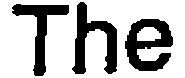

0
(72, 57, 3)


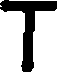

1
(72, 45, 3)


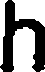

2
(52, 48, 3)


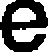

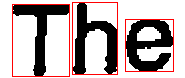

are The


In [ ]:
##################################################
# cắt từng kí tự từ 1 chữ
###################################################
result=[]
image = cv2.imread("/content/word_1.png")
original = image.copy()
# image=cv2.resize(image,(image.shape[1]*2,image.shape[0]*2))
gray3 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh3 = cv2.threshold(gray3, 120, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh3 = cv2.adaptiveThreshold(gray3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,81,12)
cv2_imshow(gray3)
# Find contours, obtain bounding box, extract and save ROI
imgs=[]
roi3_number = 0

cnts3 = cv2.findContours(thresh3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts3 = cnts3[0] if len(cnts3) == 2 else cnts3[1]
sorted_cnts3 = sort_contours(cnts3)[0]
for c in sorted_cnts3:
  x,y,w,h = cv2.boundingRect(c)
  if  h >= 1 and h <= 500:
    # cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    # if x>4:
    #   x-=4
    # w+=8
    # if y>10:
    #   y-=10
    # h+=20
    ROI = original[y:y+h, x:x+w]
    # expand_h=int((28-ROI.shape[0])/2)
    # expand_r=int((28-ROI.shape[1])/2)
    # if expand_h>0 and expand_r>0:
    #   ROI=cv2.copyMakeBorder(ROI,expand_h,28-(expand_h+ROI.shape[0]),expand_r,28-(expand_r+ROI.shape[1]),borderType=cv2.BORDER_CONSTANT,value=[255,255,255])
    # else:
    print(roi3_number)
    print(ROI.shape)
    cv2_imshow(ROI)
    ROI = cv2.resize(ROI, (60,60), interpolation = cv2.INTER_LINEAR)
      
    ROI= ROI[:,:,0]
    ROI = np.expand_dims(ROI, 2)
    for i in range(ROI.shape[1]):
      for j in range(ROI.shape[0]):
        if ROI[i,j]<190 and ROI[i,j]>=170:
         ROI[i,j]= np.round(ROI[i,j]*0.3) 
        elif ROI[i,j]<170:
          ROI[i,j]=0
        elif ROI[i,j]<210 and ROI[i,j]>=190:
          ROI[i,j]= np.round(ROI[i,j]*0.6) 
    # cv2_imshow(ROI)
    cv2.rectangle(image,(x,y),( x + w, y + h ),(1,0,255),1)
    cv2.waitKey(0)
    cv2.imwrite('char_{}.png'.format(roi3_number), ROI)
    imgs.append(ROI)
    roi3_number += 1
cv2_imshow(image)
chars=255-np.array(imgs)
if(len(chars)>=1):
  # print(model.predict(chars))
  preds=np.argmax(model.predict(chars),axis=1)
  w=""
  for pred in preds:
	  label = labelNames[pred]
	  w+=label
  result.append(w)
print(" ".join(result))
